# EDA of accidents occurred in USA between 2016-2020 and build a machine learning model to predict delays due to an accident 

## Import Pre-requisite packages for performing data analysis

In [1]:
# For pyspark session creation and using pyspark and SQL functionality for data analysis
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *

# For performing pandas dataframe calculations
import pandas as pd
import numpy as np

# For data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import datetime

print(datetime.datetime.now())

2020-10-19 09:15:20.228049


In [2]:
# set column view in pandas to max_columns : all the columns are visible
pd.set_option('max_columns', None)

In [3]:
# print python version : Pyspark had issues working with python version 3.8.2 so I had to downgrade the version
from platform import python_version
print("python version is -->",python_version())


python version is --> 3.6.9


# Pyspark Session Creation and load data set

In [5]:
# start the spark session
# use local[*] to use all the available core of the computer for processing
sparkSession = SparkSession.builder.master("local[*]").appName("7082CEM_CourseWork_Sushil").getOrCreate()

In [6]:
sparkSession

In [7]:
# load the input data file( csv format, stored on local storage)
accidents_df=sparkSession.read.csv("US_Accidents_June20.csv",inferSchema=True,header=True)

type(accidents_df)

pyspark.sql.dataframe.DataFrame

In [6]:
#OPTIONAL: uncomment to process only subset of data based on date range

# accidents_df = accidents_df.filter(accidents_df.Start_Time.\
#                                          between('2017-01-01 00:00:00','2018-01-01 00:00:00'))

In [7]:
# count the total number of records in data set 
print("No.Of Rows:", accidents_df.count()) 
print("No.Of Columns:",len(accidents_df.columns))

No.Of Rows: 3513617
No.Of Columns: 49


In [8]:
# print schema of the dataset
accidents_df.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Source: string (nullable = true)
 |-- TMC: double (nullable = true)
 |-- Severity: integer (nullable = true)
 |-- Start_Time: timestamp (nullable = true)
 |-- End_Time: timestamp (nullable = true)
 |-- Start_Lat: double (nullable = true)
 |-- Start_Lng: double (nullable = true)
 |-- End_Lat: double (nullable = true)
 |-- End_Lng: double (nullable = true)
 |-- Distance(mi): double (nullable = true)
 |-- Description: string (nullable = true)
 |-- Number: double (nullable = true)
 |-- Street: string (nullable = true)
 |-- Side: string (nullable = true)
 |-- City: string (nullable = true)
 |-- County: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Zipcode: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Timezone: string (nullable = true)
 |-- Airport_Code: string (nullable = true)
 |-- Weather_Timestamp: timestamp (nullable = true)
 |-- Temperature(F): double (nullable = true)
 |-- Wind_Chill(F): double (n

In [9]:
# use show() function to list top 4 rows of pyspark dataframe
accidents_df.show(2)

+---+--------+-----+--------+-------------------+-------------------+---------+----------+-------+-------+------------+--------------------+------+--------+----+------------+----------+-----+----------+-------+----------+------------+-------------------+--------------+-------------+-----------+------------+--------------+--------------+---------------+-----------------+-----------------+-------+-----+--------+--------+--------+-------+-------+----------+-------+-----+---------------+--------------+------------+--------------+--------------+-----------------+---------------------+
| ID|  Source|  TMC|Severity|         Start_Time|           End_Time|Start_Lat| Start_Lng|End_Lat|End_Lng|Distance(mi)|         Description|Number|  Street|Side|        City|    County|State|   Zipcode|Country|  Timezone|Airport_Code|  Weather_Timestamp|Temperature(F)|Wind_Chill(F)|Humidity(%)|Pressure(in)|Visibility(mi)|Wind_Direction|Wind_Speed(mph)|Precipitation(in)|Weather_Condition|Amenity| Bump|Crossing|

In [10]:
# Convert top 5 rows to pandas data frame. Pandas data frame provides better readability of data compared 
# to pyspark data frames in jupyter notebook.

In [11]:
accidents_df.limit(5).toPandas().head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,None,None,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,None,None,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,None,None,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,None,None,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,None,None,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


# Data Pre-processing
1. Find missing values/Null Values in each columns - NULL VALUE ANALYSIS
2. Identify the columns which are not useful and drop from the dataframe
3. Create new calculated fields which are derived from other fields

In [8]:
# count null values in each column {Note: Using format in print statement has side effect on extracting dates,
#if any problem encountered in date extraction, comment this cell and relanch notebook}

for col in accidents_df.columns:
    count=accidents_df.filter(accidents_df[col].isNull()).count()
    print("{:20}".format(col),'\t' "Null value Count : ","{:9d}".format(count),'\t' "{:.0%}".format((count/3513617)))
    

ID                   	Null value Count :          0 	0%
Source               	Null value Count :          0 	0%
TMC                  	Null value Count :    1034799 	29%
Severity             	Null value Count :          0 	0%
Start_Time           	Null value Count :          0 	0%
End_Time             	Null value Count :          0 	0%
Start_Lat            	Null value Count :          0 	0%
Start_Lng            	Null value Count :          0 	0%
End_Lat              	Null value Count :    2478818 	71%
End_Lng              	Null value Count :    2478818 	71%
Distance(mi)         	Null value Count :          0 	0%
Description          	Null value Count :          1 	0%
Number               	Null value Count :    2262864 	64%
Street               	Null value Count :          0 	0%
Side                 	Null value Count :          0 	0%
City                 	Null value Count :        112 	0%
County               	Null value Count :          0 	0%
State                	Null value Count :    

<B><H3>Fields to Drop based on Initial review data. </H3></B><br><br>
     <B><H4>>> If the field contain more than 50% null values, we will drop that field </H4></B><br>
            * End_Lat<br>
            * End_Lng<br>
            * Number<br>
            * Wind_Chill(F) <br>
            * Precipitation(in)<br>    
    
 <B><H4>
    >> Some of the fields like ID, TMC, Number, Street, Side Twilights, Zipcode etc are not providing any useful information for accident analysis, so we will drop them</H4></B></B><br>
            * ID <br>
            * TMC<br>
            * Street <br>
            * Side<br>
            * Civil_Twilight<br>
            * Nautical_Twilight<br>
            * Astronomical_Twilight<br>
            * Airport <br>
            * Country <br>
            * Zipcode <br>
            * Weather_TimeStamp<br>
            * Pressure(in) <br>   
            
    


In [13]:
#OPTIONAL: 1.extract lat and lng value for plotting geospatial graph using Tablaeu
# location = accidents_df.select('Start_Time','Start_Lat','Start_Lng','Severity')
# location.write.csv("Location_Cooridinates.csv")

In [14]:
#OPTIONAL: 1.1 save lat and lng value into a file for plotting geospatial graph using Tablaeu
# location1=location.toPandas()
# location1.to_csv("Accident_LocationInfo.csv")

In [15]:
# Drop the fields based on the initial assessment
accidents_df=accidents_df.drop('ID','End_Lat','Start_Lat','Start_Lng','End_Lng','TMC','Number','Civil_Twilight',\
                               'Nautical_Twilight','Astronomical_Twilight',\
                               'Airport_Code','Country','Street','Zipcode','Weather_TimeStamp',\
                               'Side','Pressure(in)','Wind_Chill(F)','Precipitation(in)')

In [16]:
# Drop the duplicates
accidents_df=accidents_df.drop_duplicates()

In [17]:
# New Schema after dropping the unwanted fields
accidents_df.printSchema()

root
 |-- Source: string (nullable = true)
 |-- Severity: integer (nullable = true)
 |-- Start_Time: timestamp (nullable = true)
 |-- End_Time: timestamp (nullable = true)
 |-- Distance(mi): double (nullable = true)
 |-- Description: string (nullable = true)
 |-- City: string (nullable = true)
 |-- County: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Timezone: string (nullable = true)
 |-- Temperature(F): double (nullable = true)
 |-- Humidity(%): double (nullable = true)
 |-- Visibility(mi): double (nullable = true)
 |-- Wind_Direction: string (nullable = true)
 |-- Wind_Speed(mph): double (nullable = true)
 |-- Weather_Condition: string (nullable = true)
 |-- Amenity: boolean (nullable = true)
 |-- Bump: boolean (nullable = true)
 |-- Crossing: boolean (nullable = true)
 |-- Give_Way: boolean (nullable = true)
 |-- Junction: boolean (nullable = true)
 |-- No_Exit: boolean (nullable = true)
 |-- Railway: boolean (nullable = true)
 |-- Roundabout: boolean (nullabl

In [18]:
# Extract Date
accidents_df = accidents_df.withColumn('Date',split(col('Start_Time'), ' ').getItem(0).cast(DateType()))


In [19]:
# find the year and month of an accident from 'Date' field. Create new fields to store these information

# accidents_df = accidents_df.withColumn('Year',split(col('Date'),'-').getItem(0).cast(IntegerType()))
# accidents_df = accidents_df.withColumn('Month',split(col('Date'),'-').getItem(1).cast(IntegerType()))

accidents_df = accidents_df.withColumn("Year", date_format(col('Start_Time'),"Y"))
accidents_df = accidents_df.withColumn("Month", date_format(col('Start_Time'),"M"))

In [20]:
# Extract Time
accidents_df= accidents_df.withColumn("Time",split(col('Start_Time'), ' ').getItem(1))

# Find Hour of accident
# accidents_df = accidents_df.withColumn("Hour",hour('Start_Time'))


## Create a new field to find what part of the day accident occur

Morning     5 am to 12 pm (noon)<br>
  * Early morning    5 to 8 am<br>
  * Late morning     8 am to 12pm<br>

Afternoon     12 pm to 5 pm<br>
  * Early afternoon   12 to 3pm<br>
  * Late afternoon    3 to 5pm<br>

Evening     5 pm to 9 pm<br>
  * Early evening   5 to 9 pm<br>

Night    9 pm to 4 am<br>


In [21]:
accidents_df = accidents_df.withColumn("PartOfDay",\
                 when((split(col('Time'),':').getItem(0).cast(IntegerType()) >=5) & \
                      (split(col('Time'),':').getItem(0).cast(IntegerType()) <8),"Early_Morning")\
                  .otherwise(when((split(col('Time'),':').getItem(0).cast(IntegerType()) >=8) & \
                                  (split(col('Time'),':').getItem(0).cast(IntegerType()) <12),"Late_Morning")\
                 
                      .otherwise(when((split(col('Time'),':').getItem(0).cast(IntegerType()) >=12) & \
                                  (split(col('Time'),':').getItem(0).cast(IntegerType()) <15),"Early_Afternoon")\
                          .otherwise(when((split(col('Time'),':').getItem(0).cast(IntegerType()) >=15) & \
                                  (split(col('Time'),':').getItem(0).cast(IntegerType()) <17),"Late_Afternoon")\
                
                              .otherwise(when((split(col('Time'),':').getItem(0).cast(IntegerType()) >=17) & \
                                  (split(col('Time'),':').getItem(0).cast(IntegerType()) <19),"Early_Evening")\
                
                                .otherwise("Night")
                
                            )
                        )
                    )
                )     
            )

In [22]:
# 5 new fields are created: Year, Month, Date, Time and 'Part of the day'
accidents_df.printSchema()

root
 |-- Source: string (nullable = true)
 |-- Severity: integer (nullable = true)
 |-- Start_Time: timestamp (nullable = true)
 |-- End_Time: timestamp (nullable = true)
 |-- Distance(mi): double (nullable = true)
 |-- Description: string (nullable = true)
 |-- City: string (nullable = true)
 |-- County: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Timezone: string (nullable = true)
 |-- Temperature(F): double (nullable = true)
 |-- Humidity(%): double (nullable = true)
 |-- Visibility(mi): double (nullable = true)
 |-- Wind_Direction: string (nullable = true)
 |-- Wind_Speed(mph): double (nullable = true)
 |-- Weather_Condition: string (nullable = true)
 |-- Amenity: boolean (nullable = true)
 |-- Bump: boolean (nullable = true)
 |-- Crossing: boolean (nullable = true)
 |-- Give_Way: boolean (nullable = true)
 |-- Junction: boolean (nullable = true)
 |-- No_Exit: boolean (nullable = true)
 |-- Railway: boolean (nullable = true)
 |-- Roundabout: boolean (nullabl

In [23]:
accidents_df.show(2)

+--------+--------+-------------------+-------------------+------------+--------------------+----------+-------+-----+----------+--------------+-----------+--------------+--------------+---------------+-----------------+-------+-----+--------+--------+--------+-------+-------+----------+-------+-----+---------------+--------------+------------+--------------+----------+----+-----+--------+---------------+
|  Source|Severity|         Start_Time|           End_Time|Distance(mi)|         Description|      City| County|State|  Timezone|Temperature(F)|Humidity(%)|Visibility(mi)|Wind_Direction|Wind_Speed(mph)|Weather_Condition|Amenity| Bump|Crossing|Give_Way|Junction|No_Exit|Railway|Roundabout|Station| Stop|Traffic_Calming|Traffic_Signal|Turning_Loop|Sunrise_Sunset|      Date|Year|Month|    Time|      PartOfDay|
+--------+--------+-------------------+-------------------+------------+--------------------+----------+-------+-----+----------+--------------+-----------+--------------+-----------

# EDA - EXPLORATORY DATA ANALYSIS

In [24]:
# Identify the Source of information for an accident and then drop the col. as its not important for analysis
source_df=accidents_df.groupBy('Source','Severity').count()
source_df.persist()
source_df.orderBy(['Severity','Source']).show()

+-------------+--------+-------+
|       Source|Severity|  count|
+-------------+--------+-------+
|         Bing|       1|  26167|
|     MapQuest|       1|   1049|
|MapQuest-Bing|       1|     19|
|         Bing|       2| 727436|
|     MapQuest|       2|1592391|
|MapQuest-Bing|       2|  39611|
|         Bing|       3| 156877|
|     MapQuest|       3| 812623|
|MapQuest-Bing|       3|  24786|
|         Bing|       4| 102948|
|     MapQuest|       4|   6769|
|MapQuest-Bing|       4|     60|
+-------------+--------+-------+



In [25]:
source_pd=source_df.toPandas()

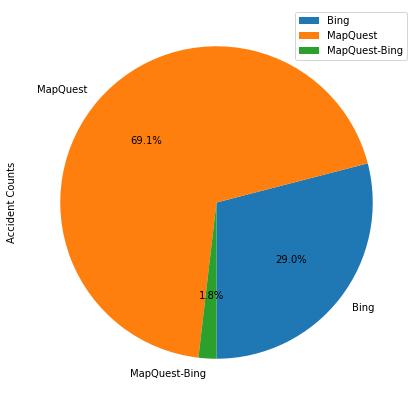

In [26]:
fig,axis = plt.subplots(figsize=(7,8))
source_pd.groupby('Source').sum().plot(kind='pie',ax=axis,\
                                       y='count',autopct='%1.1f%%', startangle=270, fontsize=10)

title = 'Fig 1.0:Source Of traffic accidents'.upper()
# plt.title(title,fontsize=17)
plt.ylabel('Accident Counts')

fig.savefig("Fig1_SoureOfTrafficAccidents.jpg",dpi=300)



In [27]:
accidents_df=accidents_df.drop('Source')

# *******************************************************

 ## 1. Identifying outliers in the dataset and resolving

##### The IQR is a measure of variability, based on dividing a data set into quartiles. 
Quartiles divide a rank-ordered data set into four equal parts. The values that separate parts are called the 
first, second, and third quartiles; and they are denoted by Q1, Q2, and Q3, respectively. <br>

IQR = Q3-Q1
<br>
The IQR can be used to identify outliers <br>
![InterQuartile](IQR.png)

#### Boxplot - This kind of plot shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. This means that each value in the boxplot corresponds to an actual observation in the data. 

Source: https://seaborn.pydata.org/tutorial/categorical.html#categorical-tutoria
<br><i>* IQR Defination Source from Wikipedia</i>

In [28]:
# identify how many non strings field are present in data set for outliers analysis
[i for i in accidents_df.dtypes if 'string' not in i[1]]

[('Severity', 'int'),
 ('Start_Time', 'timestamp'),
 ('End_Time', 'timestamp'),
 ('Distance(mi)', 'double'),
 ('Temperature(F)', 'double'),
 ('Humidity(%)', 'double'),
 ('Visibility(mi)', 'double'),
 ('Wind_Speed(mph)', 'double'),
 ('Amenity', 'boolean'),
 ('Bump', 'boolean'),
 ('Crossing', 'boolean'),
 ('Give_Way', 'boolean'),
 ('Junction', 'boolean'),
 ('No_Exit', 'boolean'),
 ('Railway', 'boolean'),
 ('Roundabout', 'boolean'),
 ('Station', 'boolean'),
 ('Stop', 'boolean'),
 ('Traffic_Calming', 'boolean'),
 ('Traffic_Signal', 'boolean'),
 ('Turning_Loop', 'boolean'),
 ('Date', 'date')]

In [29]:
# For all the int & float data type from above list - extract the data and draw Boxplot diagram and calculate IQR

In [30]:
distance=accidents_df.select('Distance(mi)').toPandas()

In [31]:
Temperature=accidents_df.select('Temperature(F)').toPandas()

In [32]:
Humidity=accidents_df.select('Humidity(%)').toPandas()

In [33]:
Visibility=accidents_df.select('Visibility(mi)').toPandas()

In [34]:
Wind_Speed=accidents_df.select('Wind_Speed(mph)').toPandas()

In [35]:
Severity=accidents_df.select('Severity').toPandas()

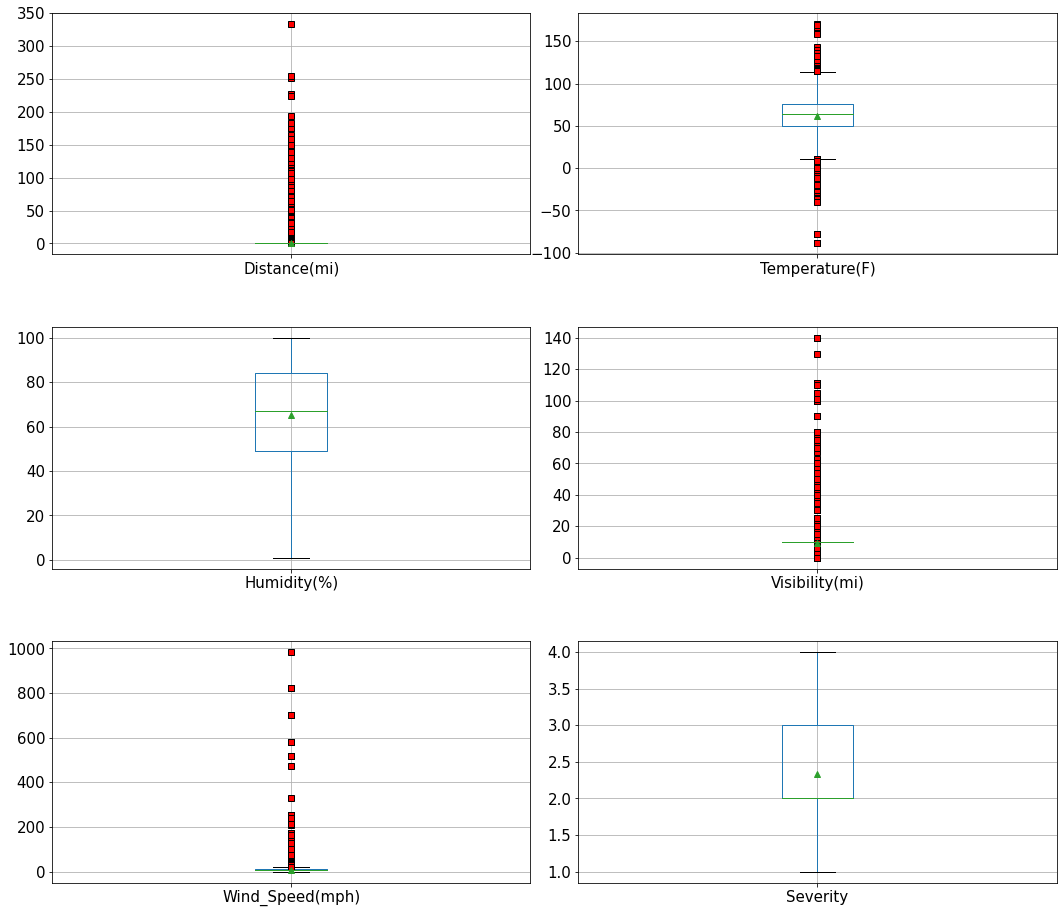

In [36]:
fig,axis = plt.subplots(3,2,figsize=(18,16),gridspec_kw={'hspace': 0.3, 'wspace': 0.1})
red_square = dict(markerfacecolor='r', marker='s')

distance.boxplot(ax=axis[0][0],showmeans=True,fontsize=15,flierprops=red_square)
Temperature.boxplot(ax=axis[0][1],showmeans=True,fontsize=15,flierprops=red_square)
Humidity.boxplot(ax=axis[1][0],showmeans=True,fontsize=15,flierprops=red_square)
Visibility.boxplot(ax=axis[1][1],showmeans=True,fontsize=15,flierprops=red_square)
Wind_Speed.boxplot(ax=axis[2][0],showmeans=True,fontsize=15,flierprops=red_square)
Severity.boxplot(ax=axis[2][1],showmeans=True,fontsize=15,flierprops=red_square)

title="Fig 1.1:Boxplots to show outliers in fields(Before IQR)".upper()
# plt.suptitle(title,fontsize=20,horizontalalignment='center',verticalalignment='bottom',y=0.90)
plt.show()

fig.savefig("Fig_1.1_Boxplots_to_show_outliers_in_fields_Before_IQR.jpg")

##### Calculate IQR for the fields with outliers and replace outlier values with 'max' value

In [37]:
# DISTANCE: calculate median ( 50th percentile)
print(distance.quantile(0.50))
# calculate 95th percentile 
print(distance.quantile(0.95))

# replace all the values above 95th percentile with the median value
distance.loc[distance['Distance(mi)'] > 1.3,'Distance(mi)' ] = distance.quantile(0.50)

# update the original data set using pyspark as well
accidents_df=accidents_df.withColumn('Distance(mi)',\
                                     when(accidents_df['Distance(mi)'] > 1.3,0).\
                                     otherwise(accidents_df['Distance(mi)']))

Distance(mi)    0.0
Name: 0.5, dtype: float64
Distance(mi)    1.229
Name: 0.95, dtype: float64


In [38]:
# TEMPERATURE: calculate median ( 50th percentile)
print(Temperature.quantile(0.50))
# calculate 95th percentile 
print(Temperature.quantile(0.95))

# replace all the values above 95th percentile with the median value
Temperature.loc[(Temperature['Temperature(F)'] > 90) | (Temperature['Temperature(F)'] < 0),'Temperature(F)' ]\
                 = Temperature.quantile(0.50)

# update the original data set using pyspark as well
accidents_df=accidents_df.withColumn('Temperature(F)',\
                                     when(accidents_df['Temperature(F)'] > 90,63).\
                                     otherwise(accidents_df['Temperature(F)']))

Temperature(F)    64.0
Name: 0.5, dtype: float64
Temperature(F)    89.1
Name: 0.95, dtype: float64


In [39]:
# VISIBILITY: calculate median ( 50th percentile)
print(Visibility.quantile(0.50))
# calculate 95th percentile 
print(Visibility.quantile(0.95))

# replace all the values above 95th percentile with the median value
Visibility.loc[(Visibility['Visibility(mi)'] > 10),'Visibility(mi)' ]\
                 = Visibility.quantile(0.50)

# update the original data set using pyspark as well
accidents_df=accidents_df.withColumn('Visibility(mi)',\
                                     when(accidents_df['Visibility(mi)'] > 10,10).\
                                     otherwise(accidents_df['Visibility(mi)']))

Visibility(mi)    10.0
Name: 0.5, dtype: float64
Visibility(mi)    10.0
Name: 0.95, dtype: float64


In [40]:
# WIND_SPEED: calculate median ( 50th percentile)
print(Wind_Speed.quantile(0.50))
# calculate 95th percentile 
print(Wind_Speed.quantile(0.95))

# replace all the values above 95th percentile with the median value
Wind_Speed.loc[(Wind_Speed['Wind_Speed(mph)'] > 17.3),'Wind_Speed(mph)' ]\
                 = Wind_Speed.quantile(0.50)

# update the original data set using pyspark as well
accidents_df=accidents_df.withColumn('Wind_Speed(mph)',\
                                     when(accidents_df['Wind_Speed(mph)'] > 17.3,7).\
                                     otherwise(accidents_df['Wind_Speed(mph)']))

Wind_Speed(mph)    7.0
Name: 0.5, dtype: float64
Wind_Speed(mph)    17.3
Name: 0.95, dtype: float64


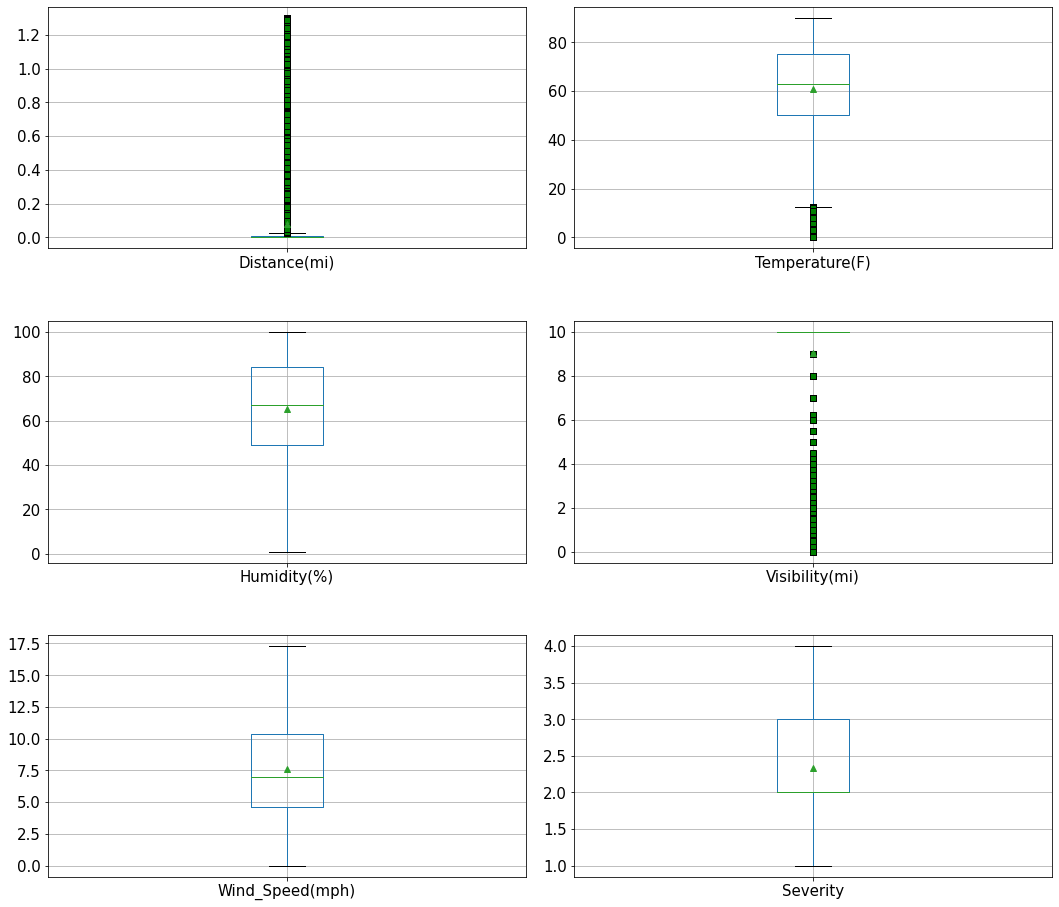

In [41]:
fig,axis = plt.subplots(3,2,figsize=(18,16),gridspec_kw={'hspace': 0.3, 'wspace': 0.1})
red_square = dict(markerfacecolor='g', marker='s')

distance.boxplot(ax=axis[0][0],showmeans=True,fontsize=15,flierprops=red_square)
Temperature.boxplot(ax=axis[0][1],showmeans=True,fontsize=15,flierprops=red_square)
Humidity.boxplot(ax=axis[1][0],showmeans=True,fontsize=15,flierprops=red_square)
Visibility.boxplot(ax=axis[1][1],showmeans=True,fontsize=15,flierprops=red_square)
Wind_Speed.boxplot(ax=axis[2][0],showmeans=True,fontsize=15,flierprops=red_square)
Severity.boxplot(ax=axis[2][1],showmeans=True,fontsize=15,flierprops=red_square)

title="Fig 1.2:Boxplots to show outliers in fields(AFTER IQR)".upper()
# plt.suptitle(title,fontsize=20,horizontalalignment='center',verticalalignment='bottom',y=0.90)
plt.show()

fig.savefig("Fig 1.2_Boxplots to show outliers in fields(After IQR).jpg")

#### Extract month wise and year wise data for accidents

In [42]:
# Create new dataframe containining accidents occur count by month and year
Monthwise = accidents_df.groupBy('Month').pivot('Year').count().orderBy('Month',Ascending=True)

# Persist the dataframe so its faster for converting to pandas dataframe and then plot the grpah

Monthwise.persist() 

DataFrame[Month: string, 2016: bigint, 2017: bigint, 2018: bigint, 2019: bigint, 2020: bigint]

In [43]:
# Check if it contains the right data
Monthwise.show()

+-----+-----+-----+-----+------+-----+
|Month| 2016| 2017| 2018|  2019| 2020|
+-----+-----+-----+-----+------+-----+
|    1| null|55289|74855| 79064|91785|
|   10|55111|74809|86876|106666| null|
|   11|64605|69989|81845| 81787| null|
|   12|59160|70924|67063| 93918| 7587|
|    2|  980|51292|71328| 74300|85579|
|    3| 6303|56603|74264| 69214|83860|
|    4|18038|47482|72453| 72855|83593|
|    5|17495|40877|76261| 73739|84379|
|    6|30349|46143|67628| 65387|97508|
|    7|45368|43116|65541| 68087| null|
|    8|55861|80763|76131| 75114| null|
|    9|54218|76737|73063| 87494| null|
+-----+-----+-----+-----+------+-----+



In [44]:
# check the schema of the new dataframe
Monthwise.printSchema()

root
 |-- Month: string (nullable = true)
 |-- 2016: long (nullable = true)
 |-- 2017: long (nullable = true)
 |-- 2018: long (nullable = true)
 |-- 2019: long (nullable = true)
 |-- 2020: long (nullable = true)



In [45]:
# convert pyspark dataframe into pandas dataframe
acc_monthly = Monthwise.toPandas()

# melt the column fields to contain all the years information into a single column
acc_monthly=acc_monthly.melt(id_vars='Month',var_name="Year",value_name='value')
acc_monthly['Month'] = pd.to_numeric(acc_monthly['Month'])
acc_monthly['Year'] = pd.to_numeric(acc_monthly['Year'])
acc_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   60 non-null     int64  
 1   Year    60 non-null     int64  
 2   value   54 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.5 KB


In [46]:
acc_monthly.head()

,Month,Year,value
0,1,2016,NaN
1,10,2016,55111.0
2,11,2016,64605.0
3,12,2016,59160.0
4,2,2016,980.0


####  Identifying outliers in the dataset


####  As seen in the below boxplot - for the year 2020, there is an entry for Dec month. This is an anamoly because the dataset is expected to contain information only until June 2020

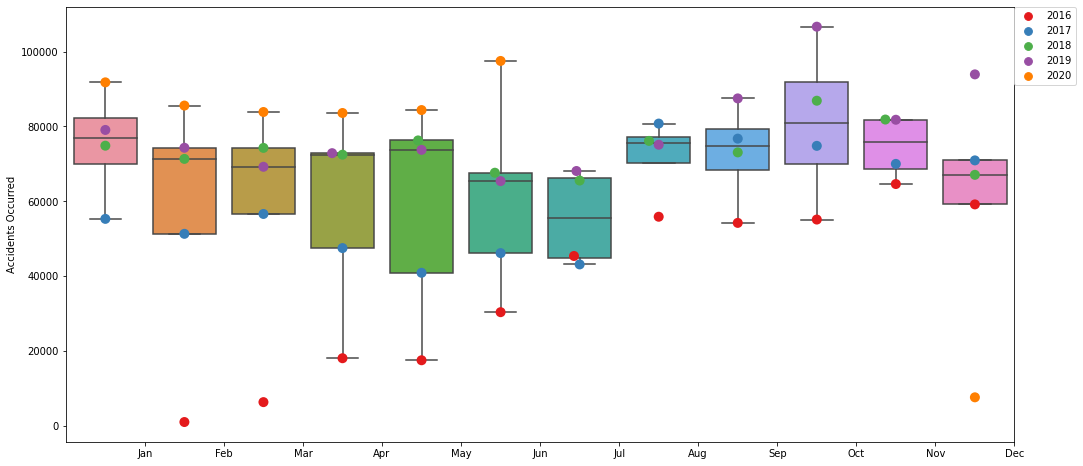

In [47]:
fig,axis=plt.subplots(figsize=(17,8))

chart = sns.boxplot(x='Month',y='value', data=acc_monthly,fliersize=0,ax=axis)
chart1= sns.swarmplot(x='Month',y='value',color='0.39',palette='Set1',hue='Year',size=10,data=acc_monthly,ax=axis)

# get the axis ticks name mapped to calendar month
axis.xaxis.tick_bottom()
xticks_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.xticks(np.arange(12)+0.5,labels=xticks_labels)
plt.xlabel('')
plt.ylabel('Accidents Occurred')
title = "Fig 1.3:Boxplot to identify any outliers from the dataframe\n".upper()
# plt.title(title, loc='center',fontsize=15)

# keep the legend box out of the plot area
axis.legend(bbox_to_anchor=(1.00, 1),borderaxespad=0)

# save the chart
fig.savefig("Fig1.3_BoxPlot.jpg",dpi=300)


In [48]:
# drop the rows containing data beyond June 2020 - its analmoly in data
# 1. drop these rows from the pandas data frame
acc_monthly = acc_monthly.drop((acc_monthly[acc_monthly.Year == 2020].index) &\
                               (acc_monthly[acc_monthly.Month>6].index))

# Drop these rows from pyspark dataframe as well
# accidents_df= accidents_df.filter((col('Year') != 2020) & (col('Month') < 6))
# accidents_df.describe('Year').show()

### 2. HEATMAP TO SHOW MONTHLY ACCIDENTS OCCURENCES OVER THE YEARS

In [49]:
# groupby Month and year
acc_monthly_heatmap = acc_monthly.groupby(['Month','Year']).sum()
acc_monthly_heatmap.head()
acc_monthly_heatmap.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 54 entries, (1, 2016) to (12, 2019)
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   54 non-null     float64
dtypes: float64(1)
memory usage: 783.0 bytes


In [50]:
# unstack indexes to get the table view - for ploting heatmap only
acc_monthly_heatmap=acc_monthly_heatmap.unstack(level=0)
acc_monthly_heatmap.head()

value                                                                 \
Month       1        2        3        4        5        6        7        8    
Year                                                                            
2016       0.0    980.0   6303.0  18038.0  17495.0  30349.0  45368.0  55861.0   
2017   55289.0  51292.0  56603.0  47482.0  40877.0  46143.0  43116.0  80763.0   
2018   74855.0  71328.0  74264.0  72453.0  76261.0  67628.0  65541.0  76131.0   
2019   79064.0  74300.0  69214.0  72855.0  73739.0  65387.0  68087.0  75114.0   
2020   91785.0  85579.0  83860.0  83593.0  84379.0  97508.0      NaN      NaN   

                                            
Month       9         10       11       12  
Year                                        
2016   54218.0   55111.0  64605.0  59160.0  
2017   76737.0   74809.0  69989.0  70924.0  
2018   73063.0   86876.0  81845.0  67063.0  
2019   87494.0  106666.0  81787.0  93918.0  
2020       NaN       NaN      NaN      NaN

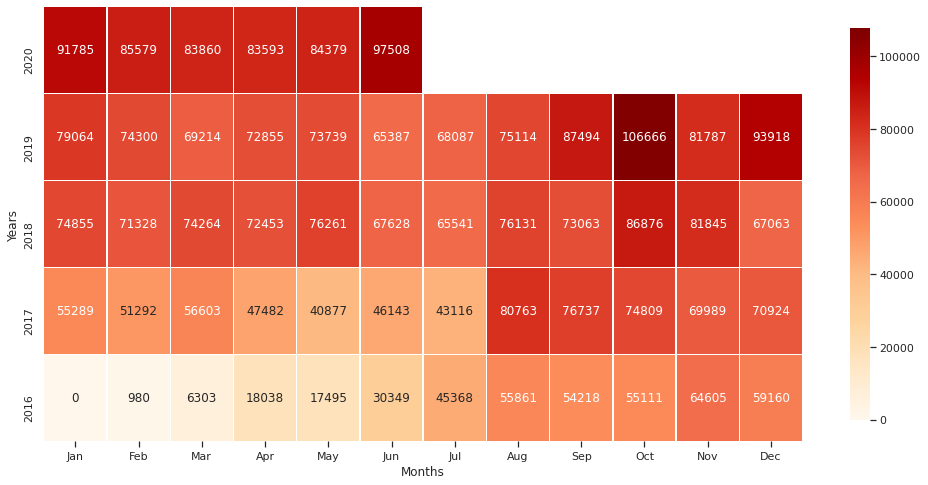

In [51]:
sns.set_theme(style="whitegrid")
fig,axis= plt.subplots(figsize=(17,8))

chart = sns.heatmap(acc_monthly_heatmap,cmap='OrRd',annot=True,fmt=".0f",vmin=0,vmax=107700,linewidth=0.3,cbar_kws={'shrink':.9})

# get the ticks name mapped to calendar month
axis.xaxis.tick_bottom()
xticks_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(12) + .5, labels=xticks_labels)

# axis labels
plt.xlabel('Months')
plt.ylabel('Years')

# Set the Y-axis in Ascendnig Order of Year
axis.invert_yaxis()
# Chart Title
title = 'Fig 2: accidents occurrence Heatmap\n'.upper()
# plt.title(title, loc='center',fontsize=15)

plt.show()
chart.figure.savefig("Fig2_HeatMap.png",format='png',transparent=False,dpi=300)

### 3. TREND CHART TO SHOW ACCIDENTS OCCURRENCE

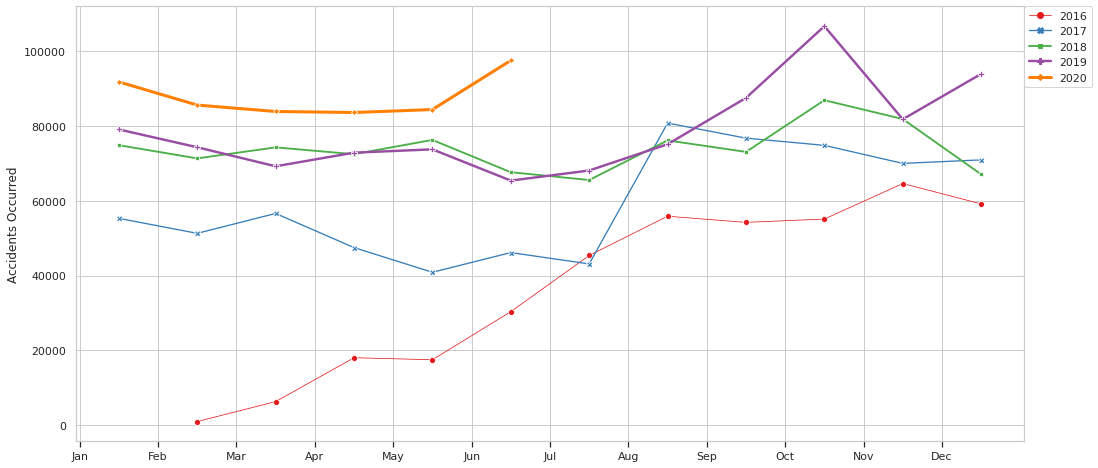

In [52]:
fig,axis=plt.subplots(figsize=(17,8))

sns.set_theme(style="whitegrid")

chart= sns.lineplot(x="Month", y="value", hue='Year',sort=True,markers=True,legend='auto',style='Year',dashes=False,
             size='Year', palette='Set1',err_style='bars',data=acc_monthly)

# get the ticks name mapped to calendar month
axis.xaxis.tick_bottom()
xticks_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(12) + .5, labels=xticks_labels)

# axis labels
plt.xlabel('')
plt.ylabel('Accidents Occurred')
# keep the legend box out of the plot area
axis.legend(bbox_to_anchor=(1.00, 1),borderaxespad=0)

# Chart Title
title = 'Fig 3:Accidents occurrence Trend (YEAR ON YEAR)\n'.upper()
# plt.title(title, loc='center',fontsize=15)

plt.show()
chart.figure.savefig('Fig3_Accidents_Trend.png',dpi=300)

### 4. Identify when did most accidents happened: What part of the day it was? How was the weather condition?

#### 3.1 What part of the day? (Between early morning - Night)

In [53]:
accidents_df.describe('Year').show()

+-------+------------------+
|summary|              Year|
+-------+------------------+
|  count|           3490736|
|   mean|2018.1395714256248|
| stddev|1.2392386140911809|
|    min|              2016|
|    max|              2020|
+-------+------------------+



In [54]:
externalFactor = accidents_df.groupBy('Year','Month').pivot('PartOfDay').count()
externalFactor.persist()

DataFrame[Year: string, Month: string, Early_Afternoon: bigint, Early_Evening: bigint, Early_Morning: bigint, Late_Afternoon: bigint, Late_Morning: bigint, Night: bigint]

In [55]:
externalFactor.orderBy('Year',Ascending=True).show(5)

# Number of rows in dataframe
externalFactor.count()
accidents_df.describe('Year').show()

+----+-----+---------------+-------------+-------------+--------------+------------+-----+
|Year|Month|Early_Afternoon|Early_Evening|Early_Morning|Late_Afternoon|Late_Morning|Night|
+----+-----+---------------+-------------+-------------+--------------+------------+-----+
|2016|    9|           8103|         6735|         7396|          6470|       15582| 9932|
|2016|    6|           5451|         4226|         3000|          3902|        7335| 6435|
|2016|    5|           2866|         2459|         1577|          2471|        3936| 4186|
|2016|    7|           8025|         5856|         5064|          5794|       11718| 8911|
|2016|    8|           9200|         7255|         7069|          6801|       15428|10108|
+----+-----+---------------+-------------+-------------+--------------+------------+-----+
only showing top 5 rows

+-------+------------------+
|summary|              Year|
+-------+------------------+
|  count|           3490736|
|   mean|2018.1395714256248|
| stddev|1.

In [56]:
# Check the schema to ensure its correct
externalFactor.printSchema()

root
 |-- Year: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Early_Afternoon: long (nullable = true)
 |-- Early_Evening: long (nullable = true)
 |-- Early_Morning: long (nullable = true)
 |-- Late_Afternoon: long (nullable = true)
 |-- Late_Morning: long (nullable = true)
 |-- Night: long (nullable = true)



In [57]:
# convert pandas dataframe for visualization
partofday = externalFactor.toPandas()
partofday.tail()

,Year,Month,Early_Afternoon,Early_Evening,Early_Morning,Late_Afternoon,Late_Morning,Night
49,2017,6,7739,6153,7014,6611,11226,7400
50,2020,6,16025,15124,12483,16823,19741,17312
51,2020,4,14014,12358,12135,13734,17118,14234
52,2019,1,9727,9356,17649,9026,21821,11485
53,2017,9,12293,10099,13743,11304,19272,10026


In [58]:
# melt the data frame to merge all the 'part of the day' into a single column
partofday_melted=partofday.melt(id_vars=(['Year','Month']),var_name='PartOfDay',value_name='value')
partofday_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Year       324 non-null    object
 1   Month      324 non-null    object
 2   PartOfDay  324 non-null    object
 3   value      324 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 10.2+ KB


In [59]:
partofday_melted.tail()

,Year,Month,PartOfDay,value
319,2017,6,Night,7400
320,2020,6,Night,17312
321,2020,4,Night,14234
322,2019,1,Night,11485
323,2017,9,Night,10026


In [60]:
# group by partOfDay to extract required data for graph
partofday_melted_grp=partofday_melted.groupby(['Year','PartOfDay']).sum().reset_index()
partofday_melted_grp.head()

,Year,PartOfDay,value
0,2016,Early_Afternoon,64856
1,2016,Early_Evening,54076
2,2016,Early_Morning,51885
3,2016,Late_Afternoon,48978
4,2016,Late_Morning,108311


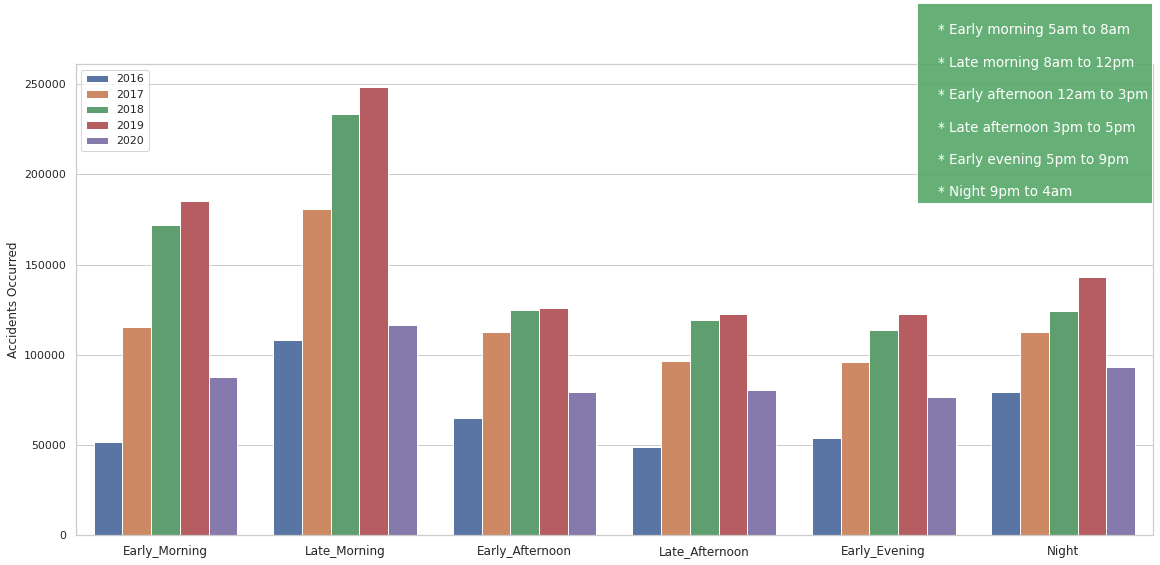

In [61]:
fig,axis=plt.subplots(figsize=(17,8))
chart= sns.barplot(x='PartOfDay',y='value',data=partofday_melted_grp,ci=None,hue='Year',\
                   order=['Early_Morning','Late_Morning','Early_Afternoon','Late_Afternoon',\
                         'Early_Evening','Night'])

# axis labels
plt.xlabel('')
plt.ylabel('Accidents Occurred')


# Chart Title
title = 'Fig 4:Accidents occurrence during "Part of Day"\n'.upper()
# plt.title(title, loc='center',fontsize=15)

chart.set_xticklabels(chart.get_xticklabels(), rotation=0,fontsize='medium',horizontalalignment='center')


text= """
    * Early morning 5am to 8am \n
    * Late morning 8am to 12pm\n
    * Early afternoon 12am to 3pm\n
    * Late afternoon 3pm to 5pm\n
    * Early evening 5pm to 9pm\n
    * Night 9pm to 4am """

plt.legend(loc='upper left')
axis.text(.757,.65, text, fontsize=13.5,color='white',bbox=dict(facecolor='g', alpha=0.9),transform=fig.transFigure) #add text
plt.tight_layout()


plt.show()
chart.figure.savefig('Fig4_Accidents_PartOfDay.png',dpi=300)

### 5: How was the weather during accident ? 

In [62]:
externalFactor1 = accidents_df.groupBy('Year','Month').pivot('Weather_Condition').count()
externalFactor1.persist()

DataFrame[Year: string, Month: string, null: bigint, Blowing Dust: bigint, Blowing Dust / Windy: bigint, Blowing Sand: bigint, Blowing Snow: bigint, Blowing Snow / Windy: bigint, Clear: bigint, Cloudy: bigint, Cloudy / Windy: bigint, Drifting Snow: bigint, Drizzle: bigint, Drizzle / Windy: bigint, Drizzle and Fog: bigint, Dust Whirls: bigint, Fair: bigint, Fair / Windy: bigint, Fog: bigint, Fog / Windy: bigint, Freezing Drizzle: bigint, Freezing Rain: bigint, Freezing Rain / Windy: bigint, Funnel Cloud: bigint, Hail: bigint, Haze: bigint, Haze / Windy: bigint, Heavy Blowing Snow: bigint, Heavy Drizzle: bigint, Heavy Freezing Drizzle: bigint, Heavy Freezing Rain: bigint, Heavy Ice Pellets: bigint, Heavy Rain: bigint, Heavy Rain / Windy: bigint, Heavy Rain Shower: bigint, Heavy Rain Showers: bigint, Heavy Sleet: bigint, Heavy Smoke: bigint, Heavy Snow: bigint, Heavy Snow / Windy: bigint, Heavy Snow with Thunder: bigint, Heavy T-Storm: bigint, Heavy T-Storm / Windy: bigint, Heavy Thunders

In [63]:
# Check the schema to ensure its correct
externalFactor1.printSchema()

root
 |-- Year: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- null: long (nullable = true)
 |-- Blowing Dust: long (nullable = true)
 |-- Blowing Dust / Windy: long (nullable = true)
 |-- Blowing Sand: long (nullable = true)
 |-- Blowing Snow: long (nullable = true)
 |-- Blowing Snow / Windy: long (nullable = true)
 |-- Clear: long (nullable = true)
 |-- Cloudy: long (nullable = true)
 |-- Cloudy / Windy: long (nullable = true)
 |-- Drifting Snow: long (nullable = true)
 |-- Drizzle: long (nullable = true)
 |-- Drizzle / Windy: long (nullable = true)
 |-- Drizzle and Fog: long (nullable = true)
 |-- Dust Whirls: long (nullable = true)
 |-- Fair: long (nullable = true)
 |-- Fair / Windy: long (nullable = true)
 |-- Fog: long (nullable = true)
 |-- Fog / Windy: long (nullable = true)
 |-- Freezing Drizzle: long (nullable = true)
 |-- Freezing Rain: long (nullable = true)
 |-- Freezing Rain / Windy: long (nullable = true)
 |-- Funnel Cloud: long (nullable = true)
 |--

In [64]:
# convert pandas dataframe for visualization
weather_condition_year = externalFactor1.toPandas()
weather_condition_year.tail()

,Year,Month,null,Blowing Dust,Blowing Dust / Windy,Blowing Sand,Blowing Snow,Blowing Snow / Windy,Clear,Cloudy,Cloudy / Windy,Drifting Snow,Drizzle,Drizzle / Windy,Drizzle and Fog,Dust Whirls,Fair,Fair / Windy,Fog,Fog / Windy,Freezing Drizzle,Freezing Rain,Freezing Rain / Windy,Funnel Cloud,Hail,Haze,Haze / Windy,Heavy Blowing Snow,Heavy Drizzle,Heavy Freezing Drizzle,Heavy Freezing Rain,Heavy Ice Pellets,Heavy Rain,Heavy Rain / Windy,Heavy Rain Shower,Heavy Rain Showers,Heavy Sleet,Heavy Smoke,Heavy Snow,Heavy Snow / Windy,Heavy Snow with Thunder,Heavy T-Storm,Heavy T-Storm / Windy,Heavy Thunderstorms and Rain,Heavy Thunderstorms and Snow,Heavy Thunderstorms with Small Hail,Ice Pellets,Light Blowing Snow,Light Drizzle,Light Drizzle / Windy,Light Fog,Light Freezing Drizzle,Light Freezing Fog,Light Freezing Rain,Light Freezing Rain / Windy,Light Hail,Light Haze,Light Ice Pellets,Light Rain,Light Rain / Windy,Light Rain Shower,Light Rain Shower / Windy,Light Rain Showers,Light Rain with Thunder,Light Sleet,Light Snow,Light Snow / Windy,Light Snow Grains,Light Snow Shower,Light Snow Showers,Light Snow and Sleet,Light Snow and Sleet / Windy,Light Snow with Thunder,Light Thunderstorm,Light Thunderstorms and Rain,Light Thunderstorms and Snow,Low Drifting Snow,Mist,Mostly Cloudy,Mostly Cloudy / Windy,N/A Precipitation,Overcast,Partial Fog,Partial Fog / Windy,Partly Cloudy,Partly Cloudy / Windy,Patches of Fog,Patches of Fog / Windy,Rain,Rain / Windy,Rain Shower,Rain Showers,Rain and Sleet,Sand,Sand / Dust Whirls Nearby,Sand / Dust Whirlwinds,Sand / Dust Whirlwinds / Windy,Scattered Clouds,Shallow Fog,Showers in the Vicinity,Sleet,Small Hail,Smoke,Smoke / Windy,Snow,Snow / Windy,Snow Grains,Snow Showers,Snow and Sleet,Snow and Sleet / Windy,Snow and Thunder,Squalls,Squalls / Windy,T-Storm,T-Storm / Windy,Thunder,Thunder / Windy,Thunder / Wintry Mix / Windy,Thunder and Hail,Thunder and Hail / Windy,Thunder in the Vicinity,Thunderstorm,Thunderstorms and Rain,Thunderstorms and Snow,Tornado,Volcanic Ash,Widespread Dust,Widespread Dust / Windy,Wintry Mix,Wintry Mix / Windy
49,2017,6,1075,NaN,NaN,NaN,NaN,NaN,17121.0,33,1.0,NaN,11.0,NaN,NaN,NaN,219.0,NaN,46,NaN,NaN,NaN,NaN,NaN,NaN,726,NaN,NaN,NaN,NaN,NaN,NaN,160,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,93.0,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1797,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239.0,NaN,NaN,27.0,7381,NaN,NaN,5756.0,NaN,NaN,5069,2.0,4.0,NaN,328,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,5656.0,2.0,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,174.0,119.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
50,2020,6,1738,14.0,8.0,NaN,NaN,NaN,NaN,10588,125.0,NaN,25.0,NaN,NaN,NaN,48143.0,926.0,331,1.0,NaN,NaN,NaN,NaN,NaN,602,9.0,NaN,3.0,NaN,NaN,NaN,307,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,277.0,46.0,NaN,NaN,NaN,NaN,NaN,137,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3253,101.0,11.0,NaN,NaN,434.0,NaN,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,16314,309.0,NaN,NaN,NaN,NaN,11445,224.0,18.0,NaN,562,22.0,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,13.0,50.0,NaN,NaN,33.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,492.0,26.0,396.0,8.0,NaN,NaN,NaN,451.0,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN
51,2020,4,1468,NaN,1.0,NaN,NaN,NaN,NaN,14220,586.0,NaN,64.0,1.0,3.0,NaN,33217.0,930.0,552,11.0,NaN,NaN,NaN,NaN,NaN,512,2.0,NaN,5.0,NaN,NaN,NaN,864,38.0,2.0,NaN,NaN,NaN,39.0,11.0,NaN,136.0,28.0,NaN,NaN,NaN,NaN,NaN,268,22.0,NaN,2.0,NaN,2.0,1.0,NaN,NaN,NaN,7247,447.0,26.0,9.0,NaN,187.0,7.0,1135.0,54.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0,10637,612.0,14.0,NaN,NaN,NaN,6391,359.0,16.0,NaN,2615,108.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,35.0,NaN,NaN,4.0,NaN,197.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,278.0,21.0,68.0,5.0,NaN,1.0,NaN,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,5.0
52,2019,1,1693,NaN,NaN,NaN,91.0,NaN,24491.0,180,22.0,NaN,57.0,NaN,NaN,NaN,259.0,10.0,488,NaN,NaN,NaN,NaN,NaN,NaN,1138,1.0,NaN,15.0,NaN,NaN,NaN,412,NaN,NaN,NaN,NaN,NaN,88.0,NaN,NaN,1.0,NaN,11.0,NaN,NaN,1.0,NaN,313,NaN,Na

In [65]:
# melt the data frame to merge all the 'Weather Condition' into a single column
weather_condition_year_melted=weather_condition_year.melt(id_vars=(['Year','Month']),\
                                                          var_name='Weather_Condition',value_name='value')
weather_condition_year_melted.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6912 entries, 0 to 6911
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               6912 non-null   object 
 1   Month              6912 non-null   object 
 2   Weather_Condition  6912 non-null   object 
 3   value              2334 non-null   float64
dtypes: float64(1), object(3)
memory usage: 216.1+ KB


In [66]:
weather_condition_year_melted.tail()

,Year,Month,Weather_Condition,value
6907,2017,6,Wintry Mix / Windy,NaN
6908,2020,6,Wintry Mix / Windy,NaN
6909,2020,4,Wintry Mix / Windy,5.0
6910,2019,1,Wintry Mix / Windy,NaN
6911,2017,9,Wintry Mix / Windy,NaN


In [67]:
# group by Weather Condition to extract required data for graph
weather_condition_year_melted_grp=weather_condition_year_melted.groupby(['Year',\
                                                                         'Weather_Condition']).sum().reset_index()
weather_condition_year_melted_grp.head()


,Year,Weather_Condition,value
0,2016,Blowing Dust,1.0
1,2016,Blowing Dust / Windy,2.0
2,2016,Blowing Sand,1.0
3,2016,Blowing Snow,16.0
4,2016,Blowing Snow / Windy,0.0


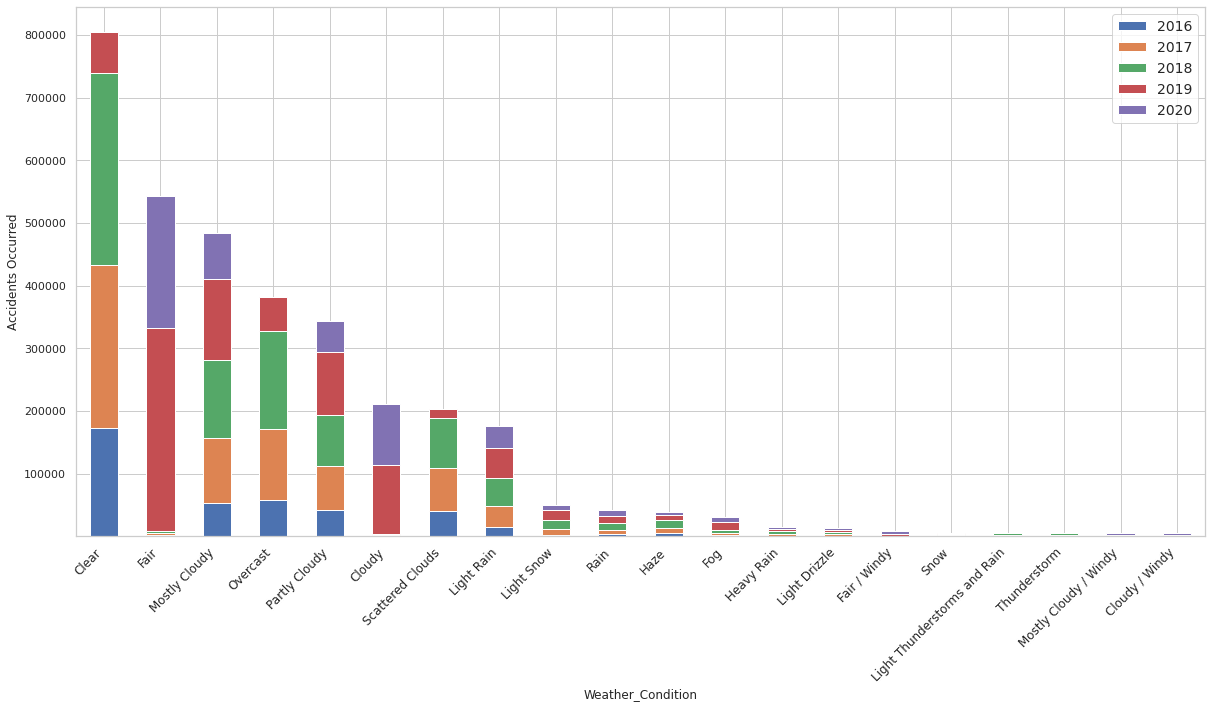

In [68]:
fig,axis=plt.subplots(figsize=(17,10))


# pandas subset to select only required values from dataset 

w1= weather_condition_year_melted_grp[(weather_condition_year_melted_grp['Weather_Condition'] != 'null')]
# Now groupby for visualizatio : X axis is Weather condition, y axis is values, and stacked is based on year

w1=w1.groupby(['Weather_Condition','Year'])['value'].sum().unstack('Year')

w1['Total'] = w1.fillna(0)['2016']+w1.fillna(0)['2017']+\
              w1.fillna(0)['2018']+w1.fillna(0)['2019']+w1.fillna(0)['2020']
w1.sort_values(by='Total',ascending=False,inplace=True)

# plot the chart now using pandas dataframe
chart = w1.drop('Total',axis=1)[:20].plot(kind='bar',stacked=True,ax=axis).get_figure()

plt.xticks(rotation=45,fontsize=12,fontweight='light',horizontalalignment='right')
plt.legend(fontsize=14)

# Chart Title
title = 'Fig 5:Top 20 Weather_Condition during Accidents \n'.upper()
# plt.title(title, loc='center',fontsize=15)
plt.ylabel("Accidents Occurred")

plt.tight_layout()
plt.show()
chart.savefig("Fig 5_WeatherCondition_duringAccidents.png",dpi=300)

In [69]:
w1.head()


Year,2016,2017,2018,2019,2020,Total
Weather_Condition,,,,,,
Clear,173051.0,259462.0,306699.0,65660.0,0.0,804872.0
Fair,2335.0,2706.0,3136.0,324277.0,210107.0,542561.0
Mostly Cloudy,53105.0,103038.0,125556.0,128614.0,74262.0,484575.0
Overcast,56976.0,114442.0,155425.0,54167.0,0.0,381010.0
Partly Cloudy,41544.0,70850.0,81470.0,100059.0,48750.0,342673.0


### 6. How was the 'weather' and what 'part of the day' was it during an accident?

In [70]:
# extract subset of data from pyspark to analyse any coorelation between weather condition and part of day
externalFactor2 = accidents_df.groupBy('PartOfDay').pivot('Weather_Condition').count()
externalFactor2.persist()

DataFrame[PartOfDay: string, null: bigint, Blowing Dust: bigint, Blowing Dust / Windy: bigint, Blowing Sand: bigint, Blowing Snow: bigint, Blowing Snow / Windy: bigint, Clear: bigint, Cloudy: bigint, Cloudy / Windy: bigint, Drifting Snow: bigint, Drizzle: bigint, Drizzle / Windy: bigint, Drizzle and Fog: bigint, Dust Whirls: bigint, Fair: bigint, Fair / Windy: bigint, Fog: bigint, Fog / Windy: bigint, Freezing Drizzle: bigint, Freezing Rain: bigint, Freezing Rain / Windy: bigint, Funnel Cloud: bigint, Hail: bigint, Haze: bigint, Haze / Windy: bigint, Heavy Blowing Snow: bigint, Heavy Drizzle: bigint, Heavy Freezing Drizzle: bigint, Heavy Freezing Rain: bigint, Heavy Ice Pellets: bigint, Heavy Rain: bigint, Heavy Rain / Windy: bigint, Heavy Rain Shower: bigint, Heavy Rain Showers: bigint, Heavy Sleet: bigint, Heavy Smoke: bigint, Heavy Snow: bigint, Heavy Snow / Windy: bigint, Heavy Snow with Thunder: bigint, Heavy T-Storm: bigint, Heavy T-Storm / Windy: bigint, Heavy Thunderstorms and 

In [71]:
# count no.of records in dataset
externalFactor2.count()

6

In [72]:
# print schema to the structure of dataset
externalFactor2.printSchema()

root
 |-- PartOfDay: string (nullable = false)
 |-- null: long (nullable = true)
 |-- Blowing Dust: long (nullable = true)
 |-- Blowing Dust / Windy: long (nullable = true)
 |-- Blowing Sand: long (nullable = true)
 |-- Blowing Snow: long (nullable = true)
 |-- Blowing Snow / Windy: long (nullable = true)
 |-- Clear: long (nullable = true)
 |-- Cloudy: long (nullable = true)
 |-- Cloudy / Windy: long (nullable = true)
 |-- Drifting Snow: long (nullable = true)
 |-- Drizzle: long (nullable = true)
 |-- Drizzle / Windy: long (nullable = true)
 |-- Drizzle and Fog: long (nullable = true)
 |-- Dust Whirls: long (nullable = true)
 |-- Fair: long (nullable = true)
 |-- Fair / Windy: long (nullable = true)
 |-- Fog: long (nullable = true)
 |-- Fog / Windy: long (nullable = true)
 |-- Freezing Drizzle: long (nullable = true)
 |-- Freezing Rain: long (nullable = true)
 |-- Freezing Rain / Windy: long (nullable = true)
 |-- Funnel Cloud: long (nullable = true)
 |-- Hail: long (nullable = true)
 

In [73]:
# convert to pandas dataframe for visualization
weather_condition = externalFactor2.toPandas()
weather_condition.tail()

,PartOfDay,null,Blowing Dust,Blowing Dust / Windy,Blowing Sand,Blowing Snow,Blowing Snow / Windy,Clear,Cloudy,Cloudy / Windy,Drifting Snow,Drizzle,Drizzle / Windy,Drizzle and Fog,Dust Whirls,Fair,Fair / Windy,Fog,Fog / Windy,Freezing Drizzle,Freezing Rain,Freezing Rain / Windy,Funnel Cloud,Hail,Haze,Haze / Windy,Heavy Blowing Snow,Heavy Drizzle,Heavy Freezing Drizzle,Heavy Freezing Rain,Heavy Ice Pellets,Heavy Rain,Heavy Rain / Windy,Heavy Rain Shower,Heavy Rain Showers,Heavy Sleet,Heavy Smoke,Heavy Snow,Heavy Snow / Windy,Heavy Snow with Thunder,Heavy T-Storm,Heavy T-Storm / Windy,Heavy Thunderstorms and Rain,Heavy Thunderstorms and Snow,Heavy Thunderstorms with Small Hail,Ice Pellets,Light Blowing Snow,Light Drizzle,Light Drizzle / Windy,Light Fog,Light Freezing Drizzle,Light Freezing Fog,Light Freezing Rain,Light Freezing Rain / Windy,Light Hail,Light Haze,Light Ice Pellets,Light Rain,Light Rain / Windy,Light Rain Shower,Light Rain Shower / Windy,Light Rain Showers,Light Rain with Thunder,Light Sleet,Light Snow,Light Snow / Windy,Light Snow Grains,Light Snow Shower,Light Snow Showers,Light Snow and Sleet,Light Snow and Sleet / Windy,Light Snow with Thunder,Light Thunderstorm,Light Thunderstorms and Rain,Light Thunderstorms and Snow,Low Drifting Snow,Mist,Mostly Cloudy,Mostly Cloudy / Windy,N/A Precipitation,Overcast,Partial Fog,Partial Fog / Windy,Partly Cloudy,Partly Cloudy / Windy,Patches of Fog,Patches of Fog / Windy,Rain,Rain / Windy,Rain Shower,Rain Showers,Rain and Sleet,Sand,Sand / Dust Whirls Nearby,Sand / Dust Whirlwinds,Sand / Dust Whirlwinds / Windy,Scattered Clouds,Shallow Fog,Showers in the Vicinity,Sleet,Small Hail,Smoke,Smoke / Windy,Snow,Snow / Windy,Snow Grains,Snow Showers,Snow and Sleet,Snow and Sleet / Windy,Snow and Thunder,Squalls,Squalls / Windy,T-Storm,T-Storm / Windy,Thunder,Thunder / Windy,Thunder / Wintry Mix / Windy,Thunder and Hail,Thunder and Hail / Windy,Thunder in the Vicinity,Thunderstorm,Thunderstorms and Rain,Thunderstorms and Snow,Tornado,Volcanic Ash,Widespread Dust,Widespread Dust / Windy,Wintry Mix,Wintry Mix / Windy
1,Late_Morning,18454,15,10,NaN,87,14,200252,53690,934,NaN,633,1,41,NaN,128770,1534,9144,42,NaN,3.0,NaN,3,NaN,14751,47,2.0,71,1.0,1.0,1.0,3975,59,NaN,NaN,2.0,NaN,516,11,2.0,311,29,340,NaN,NaN,33,1.0,3644,27.0,NaN,224,275,646,1.0,NaN,1.0,62,43678,481,31,10.0,37,386,6.0,14411,250,2.0,1.0,11,4,NaN,3,1.0,648,9,1.0,498,125265,875,104,107552,4.0,NaN,86304,558,905,NaN,10513,145,3,32,NaN,6.0,NaN,1.0,NaN,50998,218.0,84,2.0,7.0,767,3.0,1974,30,NaN,NaN,3,3.0,1.0,11,1.0,588,29,200,6,NaN,NaN,NaN,282,395,388,1.0,2.0,6.0,25,NaN,388,6
2,Early_Morning,13804,10,21,NaN,37,3,132705,46127,562,NaN,563,1,45,NaN,91389,403,14590,8,1.0,16.0,NaN,1,NaN,5706,9,NaN,63,1.0,NaN,NaN,3155,45,NaN,NaN,NaN,NaN,140,6,NaN,414,52,269,2.0,1.0,9,NaN,3113,9.0,1.0,291,486,576,1.0,NaN,NaN,38,33390,330,16,NaN,26,371,9.0,12903,205,NaN,1.0,5,2,1.0,1,NaN,573,4,NaN,1208,72096,251,103,85514,10.0,1.0,49440,159,1525,NaN,8311,88,1,13,NaN,NaN,NaN,NaN,NaN,26232,871.0,29,NaN,8.0,466,2.0,809,17,NaN,1.0,4,1.0,NaN,1,NaN,645,25,142,10,NaN,NaN,NaN,180,210,332,NaN,NaN,NaN,4,NaN,504,7
3,Night,12718,9,6,NaN,37,3,151768,37398,498,1.0,403,3,22,NaN,95818,770,4227,8,NaN,NaN,NaN,2,NaN,3646,8,NaN,61,NaN,NaN,1.0,2575,51,NaN,3.0,NaN,NaN,108,3,NaN,364,42,482,1.0,NaN,9,NaN,1711,14.0,NaN,151,147,363,5.0,NaN,NaN,39,28117,343,6,NaN,14,499,NaN,8467,169,NaN,1.0,2,5,NaN,1,1.0,814,5,NaN,433,59901,279,88,61005,NaN,NaN,43956,198,100,1.0,7153,74,2,32,NaN,1.0,NaN,NaN,NaN,22880,133.0,25,1.0,NaN,636,NaN,682,20,NaN,NaN,5,NaN,NaN,2,3.0,574,28,354,15,NaN,1.0,NaN,410,613,376,NaN,1.0,5.0,22,NaN,364,6
4,Early_Evening,9468,15,21,NaN,50,2,109523,25182,640,NaN,286,2,3,NaN,74871,1351,1027,18,NaN,NaN,NaN,6,NaN,3682,35,NaN,30,NaN,NaN,NaN,1535,30,2.0,3.0,NaN,1.0,122,7,NaN,329,47,532,1.0,6.0,11,NaN,1304,8.0,NaN,67,15,179,NaN,NaN,NaN,26,21868,268,12,1.0,26,598,NaN,4453,84,NaN,1.0,1,5,3.0,2,NaN,1047,1,2.0,80,67841,797,32,41371,NaN,NaN,54453,497,15,4.0,4501,74,9,8,NaN,NaN,NaN,

In [74]:
# melt the dataset to get all the weather condition into a single column
weather_condition_melted=weather_condition.melt(id_vars=(['PartOfDay']),var_name='Weather_Condition',value_name='value')
weather_condition_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PartOfDay          768 non-null    object 
 1   Weather_Condition  768 non-null    object 
 2   value              576 non-null    float64
dtypes: float64(1), object(2)
memory usage: 18.1+ KB


##### Notice the null values in 'value' field. We will exclude this while visualization in graph as 'null' does not provide any weather information

In [75]:
# group by weather condition and extract the required data for chart visualtion
weather_condition_melted_grp=weather_condition_melted.groupby(['PartOfDay','Weather_Condition']).sum().reset_index()
weather_condition_melted.head()

,PartOfDay,Weather_Condition,value
0,Early_Afternoon,null,10984.0
1,Late_Morning,null,18454.0
2,Early_Morning,null,13804.0
3,Night,null,12718.0
4,Early_Evening,null,9468.0


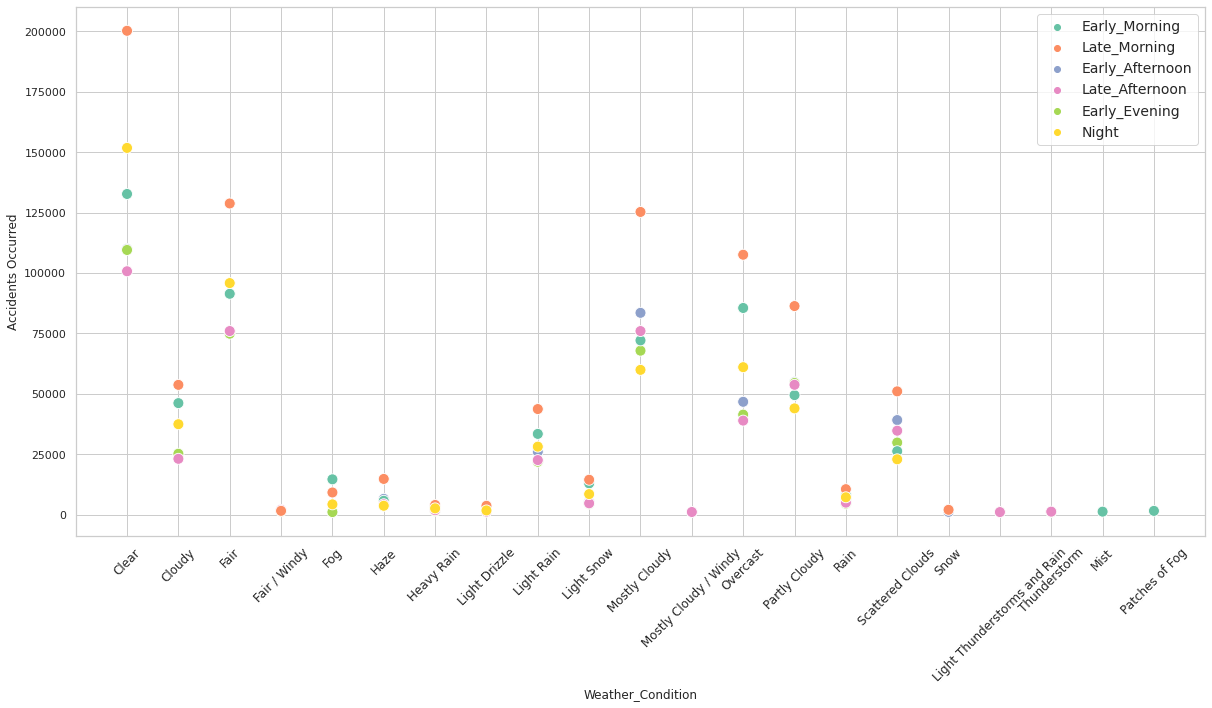

In [76]:
fix,axis=plt.subplots(figsize=(17,10))

hue_ord=['Early_Morning','Late_Morning','Early_Afternoon','Late_Afternoon',\
                         'Early_Evening','Night']

chart=sns.scatterplot(x='Weather_Condition',y='value',hue='PartOfDay',\
                      data=weather_condition_melted_grp[(weather_condition_melted_grp['value'] >1000) & \
                     (weather_condition_melted_grp['Weather_Condition'] != 'null')],\
                      s=120,palette='Set2',hue_order=hue_ord)

plt.ylabel("Accidents Occurred")   

plt.xticks(rotation=45,fontsize='medium',fontweight='light')
plt.legend(fontsize=14)

title="Fig 6:'Part of Day' and 'Weather Conditions' during Accidents [ Combined View] \n".upper()
# plt.title(title,loc='center',fontsize=17)

plt.tight_layout()
plt.show()
chart.figure.savefig("Fig6_ScatterPlot_Combined View(Weather and Daytime).png",dpi=300)

### 7. Gather surrounding information and analyse if it has any impact on accident occurrences <br>

 |-- Amenity: boolean (nullable = true) <br>
 |-- Bump: boolean (nullable = true)<br>
 |-- Crossing: boolean (nullable = true)<br>
 |-- Give_Way: boolean (nullable = true)<br>
 |-- Junction: boolean (nullable = true)<br>
 |-- No_Exit: boolean (nullable = true)<br>
 |-- Railway: boolean (nullable = true)<br>
 |-- Roundabout: boolean (nullable = true)<br>
 |-- Station: boolean (nullable = true)<br>
 |-- Stop: boolean (nullable = true)<br>
 |-- Traffic_Calming: boolean (nullable = true)<br>
 |-- Traffic_Signal: boolean (nullable = true)<br>
 |-- Turning_Loop: boolean (nullable = true)<br>

#### 1. Amenity

In [77]:
Amenity_df=accidents_df.groupBy('Amenity').count()

In [78]:
Amenity_df.printSchema()

root
 |-- Amenity: boolean (nullable = true)
 |-- count: long (nullable = false)



In [79]:
Amenity_pd=Amenity_df.toPandas()

#### 2. Bump

In [80]:
Bump_df=accidents_df.groupBy('Bump').count()
Bump_pd=Bump_df.toPandas()

#### 3.Crossing

In [81]:
Crossing_df=accidents_df.groupBy('Crossing').count()
Crossing_pd=Crossing_df.toPandas()

#### 4. Give_Way

In [82]:
Give_Way_df=accidents_df.groupBy('Give_Way').count()
Give_Way_pd=Give_Way_df.toPandas()

#### 5. Juntion

In [83]:
Junction_df=accidents_df.groupBy('Junction').count()
Junction_pd=Junction_df.toPandas()

#### 6. No_Exit

In [84]:
No_Exit_df=accidents_df.groupBy('No_Exit').count()
No_Exit_pd=No_Exit_df.toPandas()

#### 7. Railway

In [85]:
Railway_df=accidents_df.groupBy('Railway').count()
Railway_pd=Railway_df.toPandas()

#### 8. Roundabout

In [86]:
Roundabout_df=accidents_df.groupBy('Roundabout').count()
Roundabout_pd=Roundabout_df.toPandas()

#### 9. Station

In [87]:
Station_df=accidents_df.groupBy('Station').count()
Station_pd=Station_df.toPandas()

#### 10. Stop

In [88]:
Stop_df=accidents_df.groupBy('Stop').count()
Stop_pd=Stop_df.toPandas()

#### 11. Traffic_Signal

In [89]:
Traffic_Signal_df=accidents_df.groupBy('Traffic_Signal').count()
Traffic_Signal_pd=Traffic_Signal_df.toPandas()

#### 12. Turning_Loop

In [90]:
Turning_Loop_df=accidents_df.groupBy('Turning_Loop').count()
Turning_Loop_pd=Turning_Loop_df.toPandas()

### plot the graphs to visualize the data 

In [91]:
Amenity_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Amenity  2 non-null      bool 
 1   count    2 non-null      int64
dtypes: bool(1), int64(1)
memory usage: 146.0 bytes


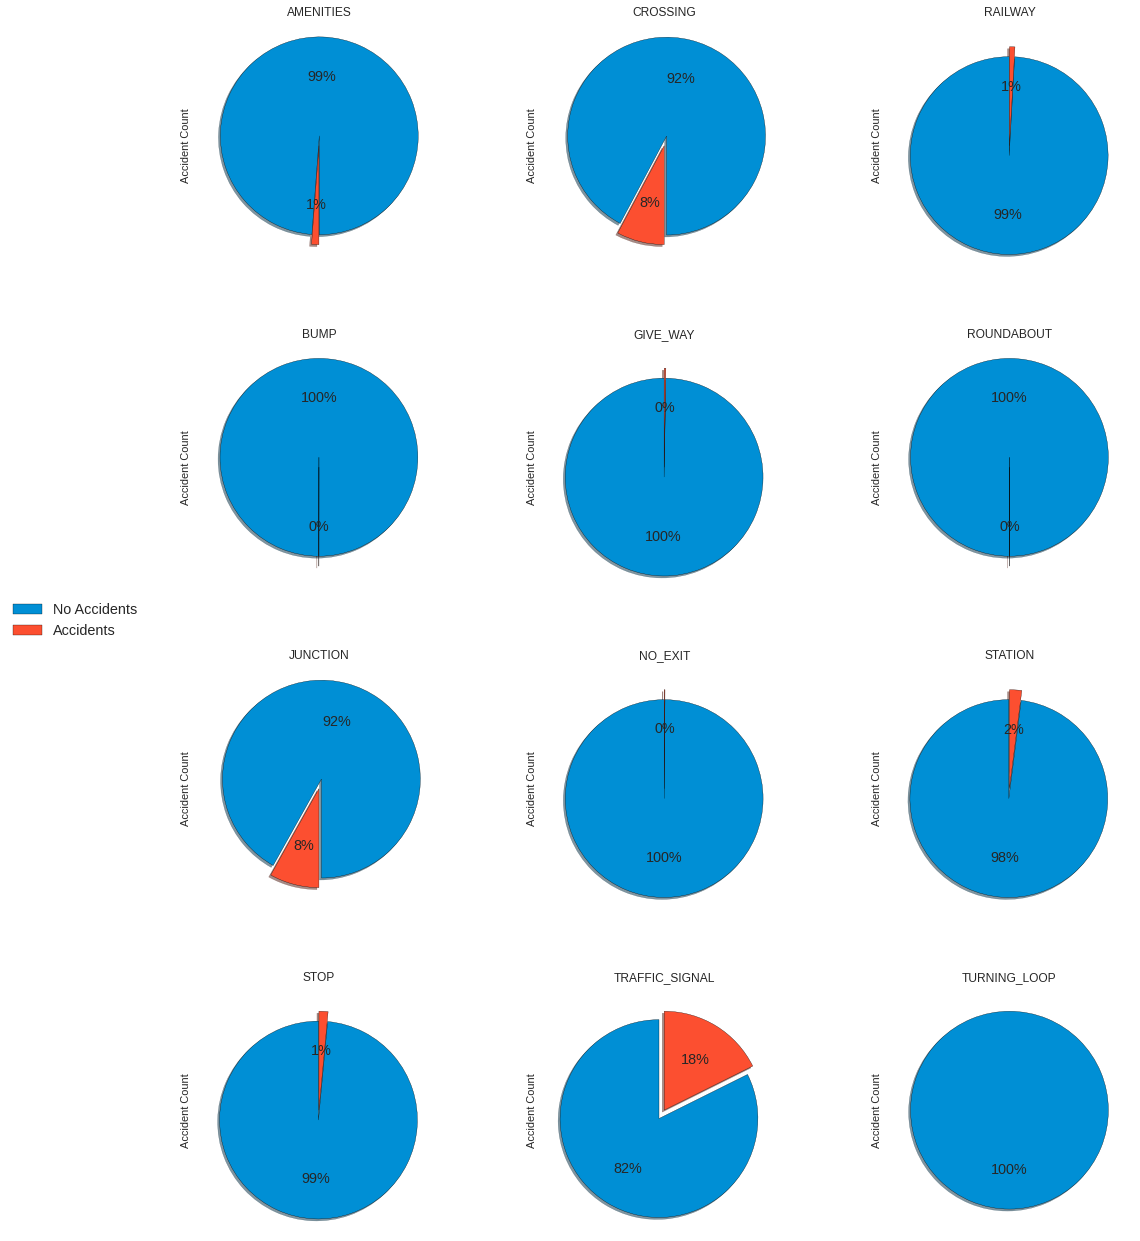

In [92]:
plt.style.use('seaborn')

fig,axis=plt.subplots(4,3,figsize=(18,22),gridspec_kw={'hspace': 0.3, 'wspace': 0.1})

labels = 'No Accidents','Accidents'
colors=['#008fd5','#fc4f30']

explode=(0.1,0)

Amenity_pd.groupby('Amenity').sum().plot(kind='pie', y='count',startangle=270,\
                                         colors=colors,wedgeprops={'edgecolor':'black'},\
                                         autopct='%1.f%%',explode=explode,\
                                         shadow=True,ax=axis[0][0],title='Amenities'.upper(),label='Accident Count',\
                                        fontsize='large',legend=False,labels=['',''])

Crossing_pd.groupby('Crossing').sum().plot(kind='pie', y='count',startangle=270,\
                                         colors=colors,wedgeprops={'edgecolor':'black'},\
                                         autopct='%1.f%%',explode=explode,\
                                         shadow=True,ax=axis[0][1],title='Crossing'.upper(),label='Accident Count',\
                                        fontsize='large',legend=False,labels=['',''])


Bump_pd.groupby('Bump').sum().plot(kind='pie', y='count',startangle=270,\
                                         colors=colors,wedgeprops={'edgecolor':'black'},\
                                         autopct='%1.f%%',explode=explode,\
                                         shadow=True,ax=axis[1][0],title='Bump'.upper(),label='Accident Count',\
                                        fontsize='large',legend=False,labels=['',''])

Give_Way_pd.groupby('Give_Way').sum().plot(kind='pie', y='count',startangle=90,\
                                         colors=colors,wedgeprops={'edgecolor':'black'},\
                                         autopct='%1.f%%',explode=explode,\
                                         shadow=True,ax=axis[1][1],title='Give_Way'.upper(),label='Accident Count',\
                                        fontsize='large',legend=False,labels=['',''])

Junction_pd.groupby('Junction').sum().plot(kind='pie', y='count',startangle=270,\
                                         colors=colors,wedgeprops={'edgecolor':'black'},\
                                         autopct='%1.f%%',explode=explode,\
                                         shadow=True,ax=axis[2][0],title='Junction'.upper(),label='Accident Count',\
                                        fontsize='large',legend=False,labels=['',''])

No_Exit_pd.groupby('No_Exit').sum().plot(kind='pie', y='count',startangle=90,\
                                         colors=colors,wedgeprops={'edgecolor':'black'},\
                                         autopct='%1.f%%',explode=explode,\
                                         shadow=True,ax=axis[2][1],title='No_Exit'.upper(),label='Accident Count',\
                                        fontsize='large',legend=False,labels=['',''])


Railway_pd.groupby('Railway').sum().plot(kind='pie', y='count',startangle=90,\
                                         colors=colors,wedgeprops={'edgecolor':'black'},\
                                         autopct='%1.f%%',explode=explode,\
                                         shadow=True,ax=axis[0][2],title='Railway'.upper(),label='Accident Count',\
                                        fontsize='large',legend=False,labels=['',''])

Roundabout_pd.groupby('Roundabout').sum().plot(kind='pie', y='count',startangle=270,\
                                         colors=colors,wedgeprops={'edgecolor':'black'},\
                                         autopct='%1.f%%',explode=explode,\
                                         shadow=True,ax=axis[1][2],title='Roundabout'.upper(),label='Accident Count',\
                                        fontsize='large',legend=False,labels=['',''])

Station_pd.groupby('Station').sum().plot(kind='pie', y='count',startangle=90,\
                                         colors=colors,wedgeprops={'edgecolor':'black'},\
                                         autopct='%1.f%%',explode=explode,\
                                         shadow=True,ax=axis[2][2],title='Station'.upper(),label='Accident Count',\
                                        fontsize='large',legend=False,labels=['',''])


Stop_pd.groupby('Stop').sum().plot(kind='pie', y='count',startangle=90,\
                                         colors=colors,wedgeprops={'edgecolor':'black'},\
                                         autopct='%1.f%%',explode=explode,\
                                         shadow=True,ax=axis[3][0],title='Stop'.upper(),label='Accident Count',\
                                        fontsize='large',legend=False,labels=['',''])

Traffic_Signal_pd.groupby('Traffic_Signal').sum().plot(kind='pie', y='count',startangle=90,\
                                         colors=colors,wedgeprops={'edgecolor':'black'},\
                                         autopct='%1.f%%',explode=explode,\
                                         shadow=True,ax=axis[3][1],title='Traffic_Signal'.upper(),label='Accident Count',\
                                        fontsize='large',legend=False,labels=['',''])

Turning_Loop_pd.groupby('Turning_Loop').sum().plot(kind='pie', y='count',startangle=90,\
                                         colors=colors,wedgeprops={'edgecolor':'black'},\
                                         autopct='%1.f%%',\
                                         shadow=True,ax=axis[3][2],title='Turning_Loop'.upper(),label='Accident Count',\
                                        fontsize='large',legend=False,labels=['',''])

title="Fig 7: Pie Chart:Show impact of surrounding factors on accidents".upper()
plt.subplots_adjust(top=0.89)

# fig.suptitle(title, fontsize=17,horizontalalignment='center',verticalalignment='bottom',y=0.94)
fig.legend(labels=labels,fontsize='large',loc='center left')
plt.show()

fig.savefig("Fig 7_Pie Chart: show impact of surrounding factors on accidents.jpg",dpi=300)


##### As we can see only 'Junction', 'Traffic_Signal' and 'Crossing'  may have some impact on the reasons of the accidents. Others from the above list have either no or negligible impact. We will keep these columns and drop rest of the columns from the main dataset.

In [93]:
accidents_df=accidents_df.drop('Turning_Loop','Stop','Station','Roundabout','Railway','No_Exit','Give_Way'\
                              'Bump','Amenity')

In [94]:
accidents_df.printSchema()
len(accidents_df.columns)
accidents_df.count()

root
 |-- Severity: integer (nullable = true)
 |-- Start_Time: timestamp (nullable = true)
 |-- End_Time: timestamp (nullable = true)
 |-- Distance(mi): double (nullable = true)
 |-- Description: string (nullable = true)
 |-- City: string (nullable = true)
 |-- County: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Timezone: string (nullable = true)
 |-- Temperature(F): double (nullable = true)
 |-- Humidity(%): double (nullable = true)
 |-- Visibility(mi): double (nullable = true)
 |-- Wind_Direction: string (nullable = true)
 |-- Wind_Speed(mph): double (nullable = true)
 |-- Weather_Condition: string (nullable = true)
 |-- Bump: boolean (nullable = true)
 |-- Crossing: boolean (nullable = true)
 |-- Give_Way: boolean (nullable = true)
 |-- Junction: boolean (nullable = true)
 |-- Traffic_Calming: boolean (nullable = true)
 |-- Traffic_Signal: boolean (nullable = true)
 |-- Sunrise_Sunset: string (nullable = true)
 |-- Date: date (nullable = true)
 |-- Year: strin

3490736

### Initially We started with
No.Of Rows: 3513617 <br>
No.Of Columns: 49  in dataset <br> 
### And after analysis have thinned down to
No.Of Rows: 3495787 <br>
No.Of Columns: 29  in dataset <br> 

## 8. Now extract climate condition to see if it has got any impact on accidents
 |-- Temperature(F): double (nullable = true)<br>
 |-- Humidity(%): double (nullable = true)<br>
 |-- Visibility(mi): double (nullable = true)<br>
 |-- Wind_Direction: string (nullable = true)<br>
 |-- Wind_Speed(mph): double (nullable = true)<br>

In [95]:
externalFactor3=accidents_df.select('Year','State','City','Severity','Temperature(F)','Humidity(%)' ,\
                                    'Visibility(mi)','Wind_Direction','Wind_Speed(mph)')


In [96]:
# externalFactor3.printSchema()

In [97]:
# externalFactor3.show(2)

In [98]:
# convert to pandas dataframe for visualization
climateCondition_df = externalFactor3.toPandas() 

In [99]:
climateCondition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3490736 entries, 0 to 3490735
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Year             object 
 1   State            object 
 2   City             object 
 3   Severity         int32  
 4   Temperature(F)   float64
 5   Humidity(%)      float64
 6   Visibility(mi)   float64
 7   Wind_Direction   object 
 8   Wind_Speed(mph)  float64
dtypes: float64(4), int32(1), object(4)
memory usage: 226.4+ MB


In [100]:
# reset the wind speed to 201 mph if the wind speed value is more than 200mph : It's seem
# errorneous data to have wind speed varying between 0-1000 mph
# climateCondition_df.loc[climateCondition_df['Wind_Speed(mph)'] > 200,'Wind_Speed(mph)'] = 201


In [ ]:
chart = sns.pairplot(data=climateCondition_df)
                  
title="Fig 8:Pairplot climate conditions correlation during the accident".upper()     

# chart.fig.suptitle(title, y=1.04)

chart.savefig('Fig 8_Pairplot_ClimateConditions.png',dpi=300)

### 8.1 Impact of climate conditions on Accidents severity

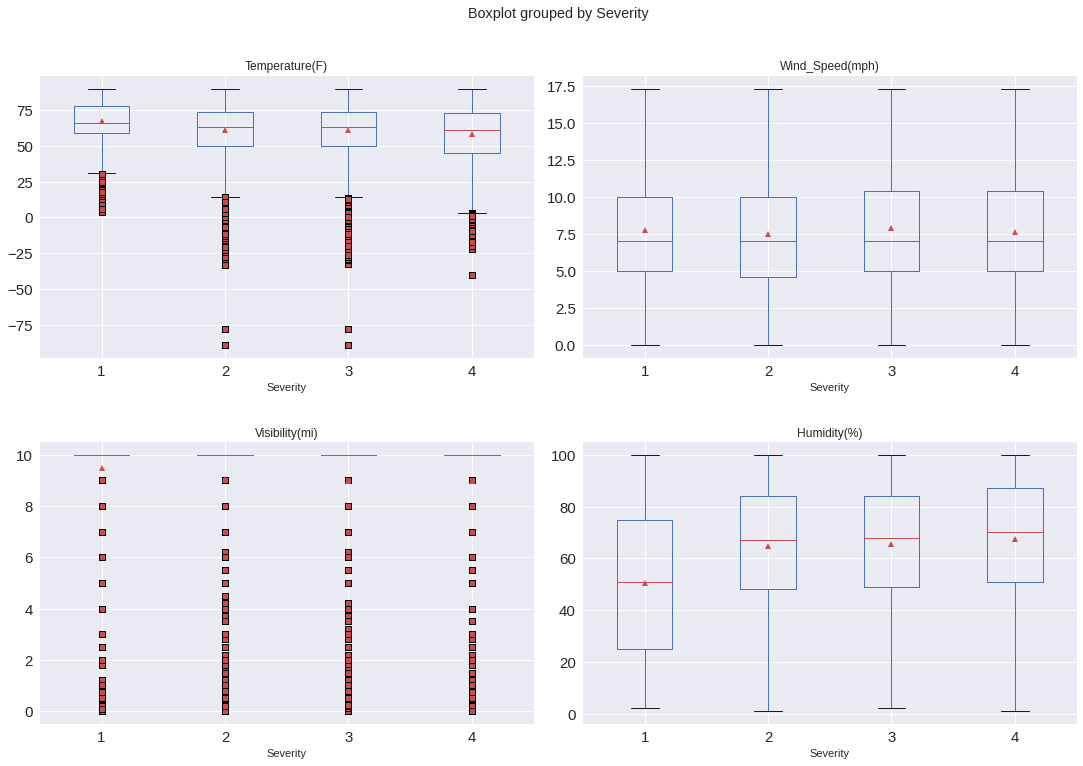

In [102]:
fig,axis=plt.subplots(2,2, figsize=(18,12),gridspec_kw={'hspace': 0.3, 'wspace': 0.1})

title= "Fig 8.1: Impact of climate conditions on Accident Severity".upper()
fig.suptitle(title, fontsize=17, y=0.90)

red_square = dict(markerfacecolor='r', marker='s')

climateCondition_df.boxplot(column='Temperature(F)',by='Severity', vert=True,ax=axis[0][0],\
                            fontsize=15,showmeans=True,showfliers=True,\
                            flierprops=red_square)

climateCondition_df.boxplot(column='Wind_Speed(mph)',by='Severity', vert=True,ax=axis[0][1],\
                            fontsize=15,showmeans=True,showfliers=True,\
                            flierprops=red_square)


climateCondition_df.boxplot(column='Visibility(mi)',by='Severity', vert=True,ax=axis[1][0],\
                            fontsize=15,showmeans=True,showfliers=True,\
                            flierprops=red_square)

climateCondition_df.boxplot(column='Humidity(%)',by='Severity', vert=True,ax=axis[1][1],\
                            fontsize=15,showmeans=True,showfliers=True,\
                            flierprops=red_square)


title= "Fig 8.1: Impact of climate conditions on Accident Severity".upper()
# fig.suptitle(title, fontsize=17,horizontalalignment='center',verticalalignment='bottom',y=0.96)

plt.show()
fig.savefig("Fig 8.1_mpact Of Climate Conditions on Accident Severity.jpg",dpi=300)

## 9. Top 20 states based on accident counts and stacked with accident severity

In [103]:
state_sev = accidents_df.groupBy('State').pivot('Severity').\
                    agg(count('Severity').alias('SeverityCount')).orderBy('State', Ascending=True)

In [104]:
state_sev.show(2)

+-----+---+-----+-----+---+
|State|  1|    2|    3|  4|
+-----+---+-----+-----+---+
|   AL|129|29911|13866|591|
|   AR| 11| 1004|  484|496|
+-----+---+-----+-----+---+
only showing top 2 rows



In [105]:
state_sev = state_sev.withColumnRenamed('1','Severity 1').withColumnRenamed('2','Severity 2').\
        withColumnRenamed('3','Severity 3').withColumnRenamed('4','Severity 4')

In [106]:
state_sev_pd=state_sev.toPandas()

In [107]:
state_sev_pd.head()
display(state_sev_pd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       49 non-null     object 
 1   Severity 1  44 non-null     float64
 2   Severity 2  49 non-null     int64  
 3   Severity 3  49 non-null     int64  
 4   Severity 4  49 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.0+ KB


None

In [108]:
state_sev_pd['Total'] = state_sev_pd['Severity 1'] + state_sev_pd['Severity 2']\
                        +state_sev_pd['Severity 3']+state_sev_pd['Severity 4']

In [109]:
state_sev_pd.sort_values(by='Total', ascending=False,inplace=True),
state_sev_pd.head()

,State,Severity 1,Severity 2,Severity 3,Severity 4,Total
3,CA,5357.0,575232,225521,8321,814431.0
41,TX,1069.0,233503,89591,4660,328823.0
8,FL,2907.0,164042,80309,8828,256086.0
38,SC,109.0,136803,34519,1105,172536.0
25,NC,1732.0,136839,21966,2868,163405.0


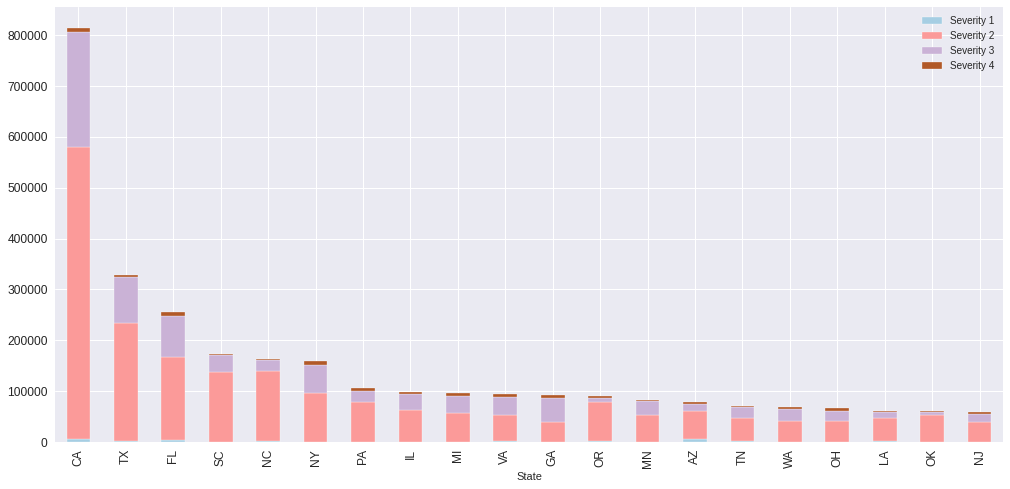

In [110]:
fig,axis=plt.subplots(figsize=(17,8))
state_sev_pd.drop('Total',axis=1)[:20].plot(kind='bar',x='State',stacked = True,ax=axis,\
                                            fontsize=12,colormap='Paired')

title="Fig 9:Top 20 States with maximum accidents(break down as per Accident severity)".upper()
# plt.title(title,fontsize=15,pad=20)
plt.show()

fig.savefig("Fig 9_AccidentSeverity_Stateswise.jpg",dpi=300)

## 10. Top 20 cities based on accident counts and stacked with accident severity

In [111]:
city_sev = accidents_df.groupBy('City').pivot('Severity').\
                    agg(count('Severity').alias('SeverityCount')).orderBy('City', Ascending=True)

In [112]:
city_sev.show(2)

+----------+----+---+---+----+
|      City|   1|  2|  3|   4|
+----------+----+---+---+----+
|      null|   3| 76| 11|  20|
|Aaronsburg|null|  2|  2|null|
+----------+----+---+---+----+
only showing top 2 rows



In [113]:
city_sev = city_sev.withColumnRenamed('1','Severity 1').withColumnRenamed('2','Severity 2').\
        withColumnRenamed('3','Severity 3').withColumnRenamed('4','Severity 4')

In [114]:
city_sev_pd=city_sev.toPandas()

In [115]:
city_sev_pd.head()
display(city_sev_pd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11896 entries, 0 to 11895
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        11895 non-null  object 
 1   Severity 1  1896 non-null   float64
 2   Severity 2  10860 non-null  float64
 3   Severity 3  6999 non-null   float64
 4   Severity 4  7772 non-null   float64
dtypes: float64(4), object(1)
memory usage: 464.8+ KB


None

In [116]:
city_sev_pd['Total'] = city_sev_pd['Severity 1'] + city_sev_pd['Severity 2']\
                        +city_sev_pd['Severity 3']+city_sev_pd['Severity 4']

In [117]:
city_sev_pd.sort_values(by='Total', ascending=False,inplace=True),
city_sev_pd.head()

,City,Severity 1,Severity 2,Severity 3,Severity 4,Total
4880,Houston,51.0,77838.0,22284.0,901.0,101074.0
6051,Los Angeles,18.0,50241.0,28012.0,699.0,78970.0
1771,Charlotte,473.0,71028.0,5375.0,285.0,77161.0
2487,Dallas,23.0,39758.0,24119.0,792.0,64692.0
426,Austin,17.0,55741.0,7794.0,259.0,63811.0


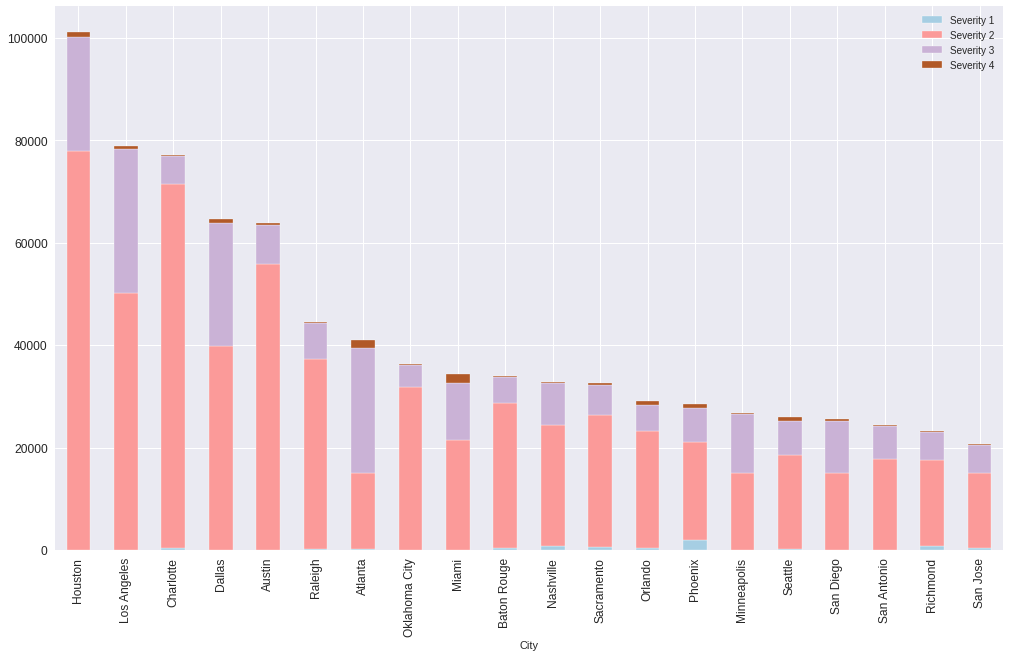

In [118]:
fig,axis=plt.subplots(figsize=(17,10))
city_sev_pd.drop('Total',axis=1)[:20].plot(kind='bar',x='City',stacked = True,ax=axis,fontsize=12,\
                                           colormap='Paired')

title="Fig 10:Top 20 Cities with maximum accidents(break down as per Accident severity)".upper()
# plt.title(title,fontsize=15,pad=20)
plt.show()

fig.savefig("Fig 10_AccidentSeverity_Citywise.jpg",dpi=300)

### 11.Time delays caused due to accidents

In [119]:
# Calculate the traffic disturption time caused due to accidents. Calculate in minutes

In [120]:
accidents_df= accidents_df.withColumn('durationAcc', (accidents_df['End_Time'].\
                                                  cast('long') - accidents_df['Start_Time'].cast('long'))/60)
accidents_df = accidents_df.withColumn('durationAcc',accidents_df['durationAcc'].cast('int'))

In [121]:
accidents_df.describe('durationAcc').show()

+-------+------------------+
|summary|       durationAcc|
+-------+------------------+
|  count|           3490736|
|   mean|111.35751314336002|
| stddev|3176.6795103352033|
|    min|               -35|
|    max|           1421955|
+-------+------------------+



In [122]:
duration_pd = accidents_df.select('Year','Month','Severity','durationAcc').toPandas()

<AxesSubplot:>

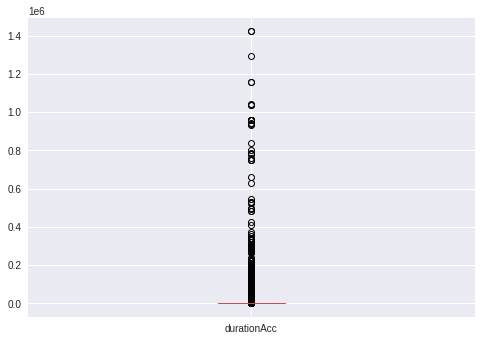

In [123]:
duration_pd['durationAcc'].plot(kind='box')

In [124]:
print(duration_pd['durationAcc'].quantile(0.5))
print(duration_pd['durationAcc'].quantile(0.95))

44.0
360.0


In [125]:
# replace all the outliers with median value
duration_pd.loc[duration_pd['durationAcc'] > 400,'durationAcc'] = duration_pd['durationAcc'].quantile(0.5)
duration_pd.loc[duration_pd['durationAcc'] < 0,'durationAcc'] = duration_pd['durationAcc'].quantile(0.5)

In [ ]:
# Use the durationAcc field as label in machine learning model to predict its value.
# Machine learning model is covered in next file.

# Coding Reference


https://seaborn.pydata.org/tutorial.html <br>
https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib <br>
https://jakevdp.github.io/PythonDataScienceHandbook/04.09-text-and-annotation.html <br>
https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166